In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import impyute.imputation as imp
from statsmodels.tsa.stattools import adfuller
import statistics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=True)

# Etapa 1: Carregar os dados

In [87]:
dados2016 = pd.read_csv('..\/01.Dados\/CSV\/MP10_Cerqueria_2016.csv')
dados2017 = pd.read_csv('..\/01.Dados\/CSV\/MP10_Cerqueria_2017.csv')
dados2018 = pd.read_csv('..\/01.Dados\/CSV\/MP10_Cerqueria_2018.csv')
dados2019 = pd.read_csv('..\/01.Dados\/CSV\/MP10_Cerqueria_2019.csv')
dados2020 = pd.read_csv('..\/01.Dados\/CSV\/MP10_Cerqueria_2020.csv')

# Etapa 2: Tratamento de dados faltantes

In [41]:
# Função para completar os dados faltantes
def completa_serie(dados,ano):
    print('-'*50)
    print('-'*24,ano,'-'*20)
    print('-'*50)
    
    # Reseta o index da série para ser por linha
    miss_dados = dados.isna().sum().sum()/(dados.shape[0]*dados.shape[1])*100
    print(f'{miss_dados.round(2)}% dos dados da bases são faltantes')
    
    # Completa os dados por Expect Maximization(EM)
    dados_filled = imp.cs.em(dados.values,loops=50)    
    d = [str(i) for i in range(1,25)]
    dados_completados = pd.DataFrame(data=dados_filled.round(0),columns=d)
    
    # Dados completados por EM
    print('*'*40,'  Base de dados completada  ','*'*40)
    display(dados_completados.head())

    # Formato da base dados
    print('*'*40,'  Formato da base dados  ','*'*40)
    display(dados_completados.shape)

    # Média diária dos dados
    print('*'*40,'Média diária dos dados','*'*40)
    dados_medios_completados = dados_completados.mean(axis='columns')
    display(dados_medios_completados)
    
    return dados_medios_completados

In [88]:
dados_medios_completados_2016 = completa_serie(dados2016,2016)
dados_medios_completados_2017 = completa_serie(dados2017,2017)
dados_medios_completados_2018 = completa_serie(dados2018,2018)
dados_medios_completados_2019 = completa_serie(dados2019,2019)
dados_medios_completados_2020 = completa_serie(dados2020,2020)

--------------------------------------------------
------------------------ 2016 --------------------
--------------------------------------------------
3.27% dos dados da bases são faltantes
****************************************   Base de dados completada   ****************************************


1     2     3     4     5     6     7     8     9    10  ...    15  \
0  28.0  31.0  28.0  21.0  17.0   9.0  10.0   7.0  15.0   8.0  ...  12.0   
1  12.0  23.0  25.0   8.0   5.0   3.0   5.0  14.0  16.0  10.0  ...   6.0   
2   2.0   9.0   7.0   7.0   6.0   6.0   4.0   8.0   4.0  11.0  ...  13.0   
3   4.0   6.0  14.0   6.0  10.0  12.0  20.0  18.0  18.0  19.0  ...  13.0   
4  12.0  16.0  21.0  13.0  15.0  13.0  15.0  21.0  14.0  26.0  ...   4.0   

     16    17    18    19    20    21    22    23    24  
0  14.0  16.0  21.0   9.0  11.0  15.0   5.0   9.0  11.0  
1  14.0   8.0   1.0   3.0   2.0   1.0   9.0   7.0   5.0  
2   9.0  11.0   9.0  16.0   6.0   4.0   2.0   6.0   6.0  
3  28.0  25.0  20.0  27.0  11.0  17.0  22.0  14.0  15.0  
4  18.0  28.0  38.0  26.0  17.0  34.0  40.0 -11.0  17.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(213, 24)

**************************************** Média diária dos dados ****************************************


0      14.250000
1       9.291667
2       7.541667
3      16.750000
4      18.791667
         ...    
208    37.375000
209    25.166667
210    25.208333
211    30.625000
212    42.250000
Length: 213, dtype: float64

--------------------------------------------------
------------------------ 2017 --------------------
--------------------------------------------------
0.92% dos dados da bases são faltantes
****************************************   Base de dados completada   ****************************************


1     2     3     4     5     6     7     8     9    10  ...    15  \
0  42.0  79.0  59.0  55.0  53.0  34.0  41.0  32.0  15.0  19.0  ...  12.0   
1  13.0  14.0  16.0  18.0   8.0  13.0  17.0  23.0  23.0  29.0  ...  16.0   
2  19.0  23.0  24.0  19.0  18.0  14.0  23.0  36.0  37.0  21.0  ...  29.0   
3  17.0  13.0  19.0  17.0  21.0  24.0  15.0  31.0  34.0  24.0  ...  17.0   
4  27.0  25.0  25.0  13.0  21.0  27.0  29.0  34.0  30.0  36.0  ...  20.0   

     16    17    18    19    20    21    22    23    24  
0  10.0   8.0  22.0   7.0  13.0  17.0  18.0  17.0  14.0  
1  18.0  18.0  25.0  14.0  16.0  12.0   8.0  11.0  11.0  
2  39.0  29.0  32.0  20.0  13.0  13.0  13.0  11.0  19.0  
3  23.0  15.0  21.0  24.0  26.0  20.0  28.0  32.0  31.0  
4  21.0  31.0  26.0  12.0  19.0  14.0  17.0  17.0  27.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(212, 24)

**************************************** Média diária dos dados ****************************************


0      25.500000
1      16.500000
2      23.958333
3      22.375000
4      23.000000
         ...    
207    34.916667
208    42.208333
209    39.541667
210    23.083333
211    36.666667
Length: 212, dtype: float64

--------------------------------------------------
------------------------ 2018 --------------------
--------------------------------------------------
1.06% dos dados da bases são faltantes
****************************************   Base de dados completada   ****************************************


1     2     3     4     5     6     7     8     9    10  ...    15  \
0  18.0  41.0  37.0  26.0  15.0  11.0  15.0   7.0   6.0  15.0  ...  10.0   
1  15.0  10.0  15.0  16.0  16.0   9.0  11.0  13.0  13.0  17.0  ...  20.0   
2  10.0   8.0  10.0   8.0   8.0   8.0  12.0   9.0  17.0  19.0  ...   8.0   
3  16.0  14.0  18.0  17.0  14.0  16.0  14.0  17.0  23.0  17.0  ...   9.0   
4  16.0  10.0  21.0  14.0  23.0  11.0  17.0  20.0  23.0  24.0  ...  22.0   

     16    17    18    19    20    21    22    23    24  
0   9.0  10.0   6.0  10.0   6.0   8.0  15.0  11.0  15.0  
1   7.0  10.0  11.0  13.0  12.0  16.0   8.0   6.0   9.0  
2  13.0  15.0   4.0  10.0   1.0   7.0   8.0   7.0  10.0  
3  17.0  21.0  23.0  20.0  21.0  18.0  17.0  17.0  20.0  
4  25.0  37.0  29.0  22.0  18.0  21.0  23.0  28.0  34.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(212, 24)

**************************************** Média diária dos dados ****************************************


0      13.500000
1      12.208333
2      10.125000
3      16.791667
4      22.125000
         ...    
207    45.791667
208    55.833333
209    61.500000
210    48.791667
211    12.958333
Length: 212, dtype: float64

--------------------------------------------------
------------------------ 2019 --------------------
--------------------------------------------------
1.97% dos dados da bases são faltantes
****************************************   Base de dados completada   ****************************************


1     2     3     4     5     6     7     8     9    10  ...    15  \
0  28.0  55.0  52.0  35.0  17.0  17.0  21.0  25.0  17.0  17.0  ...  12.0   
1  21.0  18.0  25.0  14.0  18.0  19.0  22.0  20.0  20.0  25.0  ...  10.0   
2  23.0  18.0  17.0  15.0  17.0  13.0   9.0  17.0  17.0  16.0  ...  22.0   
3   8.0   5.0   6.0   8.0  13.0  10.0  15.0  15.0  17.0  15.0  ...  22.0   
4  10.0   9.0  10.0   8.0   9.0   9.0   7.0  12.0  14.0  12.0  ...   9.0   

     16    17    18    19    20    21    22    23    24  
0  28.0  36.0  35.0  28.0  18.0  12.0  23.0  31.0  21.0  
1   9.0  10.0  12.0  18.0  27.0  17.0  26.0  40.0  19.0  
2  11.0  17.0  26.0  22.0  24.0  18.0   5.0   7.0   9.0  
3  18.0  11.0  16.0  15.0   4.0   3.0   4.0  10.0   9.0  
4   7.0   9.0   8.0  11.0  11.0  14.0  12.0   9.0  10.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(212, 24)

**************************************** Média diária dos dados ****************************************


0      24.083333
1      18.291667
2      16.083333
3      12.125000
4       9.791667
         ...    
207    34.500000
208    18.583333
209    30.041667
210    33.875000
211    26.416667
Length: 212, dtype: float64

--------------------------------------------------
------------------------ 2020 --------------------
--------------------------------------------------
6.94% dos dados da bases são faltantes
****************************************   Base de dados completada   ****************************************


1     2     3      4     5     6     7     8     9    10  ...    15  \
0  43.0  61.0  72.0  101.0  99.0  88.0  27.0   6.0  12.0  10.0  ...  10.0   
1   8.0  17.0   5.0   16.0   8.0   8.0  13.0  25.0  78.0  27.0  ...  23.0   
2   3.0   7.0   2.0    4.0   1.0   3.0   5.0   2.0   3.0   4.0  ...   2.0   
3   8.0   8.0   8.0   10.0   8.0   6.0   8.0   6.0  10.0  16.0  ...   6.0   
4  13.0  14.0  10.0    8.0   5.0  17.0  13.0  15.0  15.0  14.0  ...  17.0   

     16    17    18    19    20    21    22    23    24  
0  10.0  17.0  24.0  25.0  21.0   1.0   9.0   8.0  11.0  
1   3.0  11.0  29.0   4.0  17.0   6.0   2.0   6.0   4.0  
2   7.0   3.0   6.0   5.0   5.0  11.0   6.0   6.0   9.0  
3  13.0   7.0   0.0   5.0   1.0   6.0   3.0   6.0   4.0  
4  13.0  22.0  11.0   3.0   6.0   6.0  13.0  18.0  10.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(213, 24)

**************************************** Média diária dos dados ****************************************


0      29.291667
1      16.041667
2       7.666667
3       8.125000
4      12.291667
         ...    
208    30.041667
209    40.125000
210    10.541667
211    10.541667
212    12.541667
Length: 213, dtype: float64

# Etapa 3: Decompondo cada série

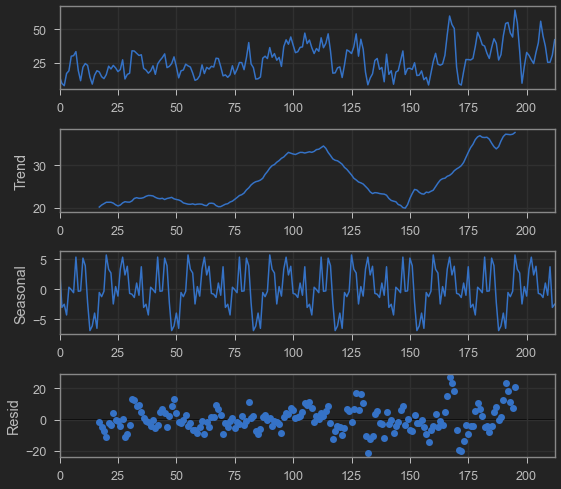

In [89]:
resultado_2016 = seasonal_decompose(dados_medios_completados_2016,period=35)
resultado_2016.plot();

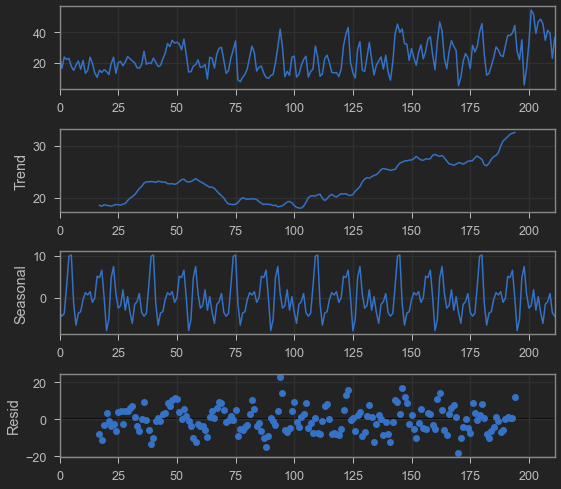

In [43]:
resultado_2017 = seasonal_decompose(dados_medios_completados_2017,period=35)
resultado_2017.plot();

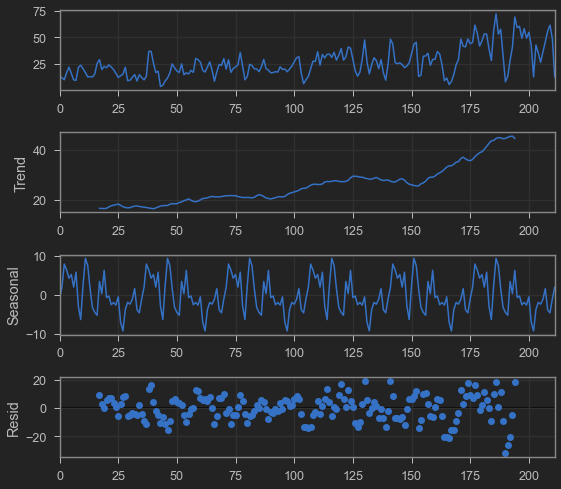

In [44]:
resultado_2018 = seasonal_decompose(dados_medios_completados_2018,period=35)
resultado_2018.plot();

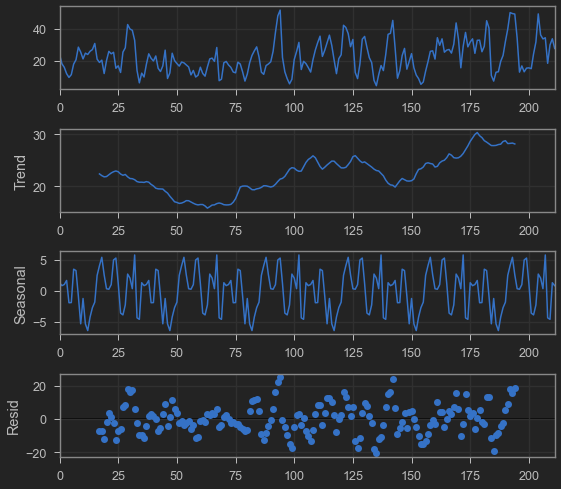

In [45]:
resultado_2019 = seasonal_decompose(dados_medios_completados_2019,period=35)
resultado_2019.plot();

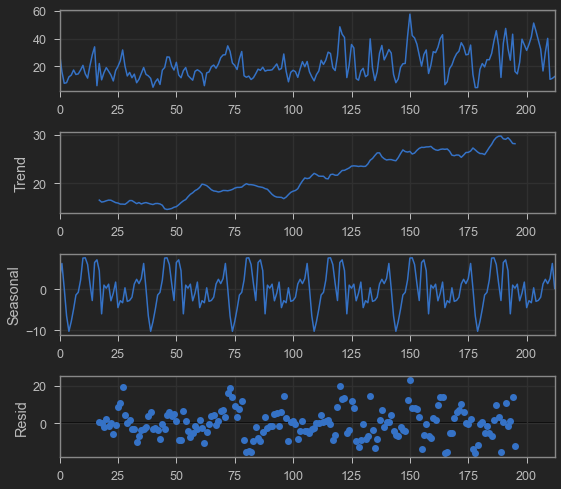

In [46]:
resultado_2020 = seasonal_decompose(dados_medios_completados_2020,period=35)
resultado_2020.plot();

# Etapa 4: Teste Estacionariedade da série
## **Teste de Dickey-Fuller**

Pode ser tamém chamdo de ADF(Augmented Dickey-Fuller):

$\Delta y_t = \beta_t + \beta_{2t} + \delta_{yt-1} + \sum_{i=1}^{m}{\alpha_i \Delta_{yt-1} + \epsilon_t}$

$\beta_1$ - intercepto drift da série

$\beta_2$ - intercepto de tendência

$\delta$  - coeficiente de presença de raiz.

m - número de defasagens tomadas na série.


+ Hipótese nula é se $\delta$ = 0;

Fazemos a regressão de $\Delta_{y_t}$ em que $y_{t-1}$ e repetindo em $\Delta_{y_{t-1}}$ em que $y_{t-2}$ e assim sucesivamente e calculamos a estatística T dada por:

$T = \frac{\delta}{se(\delta)}$

$\^\delta$ - estimador de $\delta$

$se(\^ \delta)$ - estimador do desvio padrão do erro de $\delta$

In [47]:
# Aplicar o Teste de Dickey-Fuller
def teste_estacionariedade(serie_temporal):
    
    #Teste estatístico
    print('Resultados do teste Dickey Fuller:')
    dftest = adfuller(serie_temporal.values)
    p_value = dftest[1]
    dfoutput = pd.Series(dftest[0:4], index=['Teste estatístico','p-value','#Lags Usados','Número de observações usadas'])
    for key,value in dftest[4].items():
        dfoutput['Valores críticos (%s)'%key] = value
    print(dfoutput)
    return p_value

Resultados do teste Dickey Fuller:
Teste estatístico                -4.289555
p-value                           0.000463
#Lags Usados                      3.000000
Número de observações usadas    209.000000
Valores críticos (1%)            -3.462032
Valores críticos (5%)            -2.875471
Valores críticos (10%)           -2.574195
dtype: float64


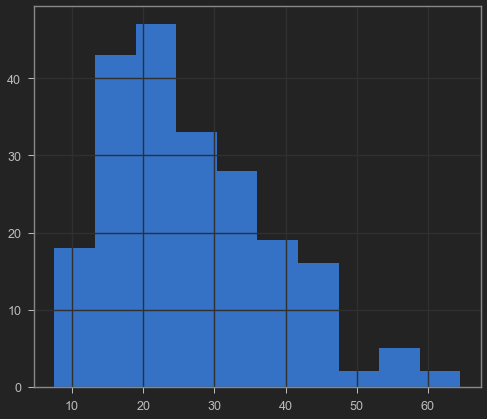

In [90]:
p_v_2016 = teste_estacionariedade(dados_medios_completados_2016)
dados_medios_completados_2016.hist()

Resultados do teste Dickey Fuller:
Teste estatístico                -4.424664
p-value                           0.000268
#Lags Usados                      3.000000
Número de observações usadas    208.000000
Valores críticos (1%)            -3.462186
Valores críticos (5%)            -2.875538
Valores críticos (10%)           -2.574231
dtype: float64


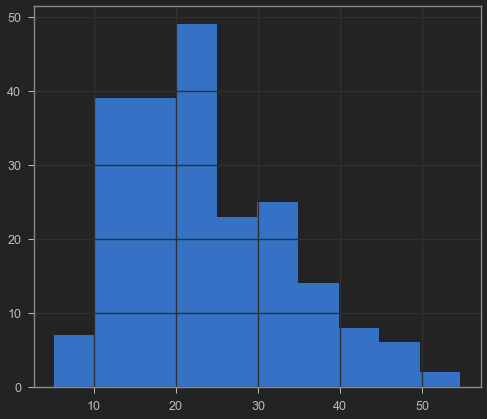

In [48]:
p_v_2017 = teste_estacionariedade(dados_medios_completados_2017)
dados_medios_completados_2017.hist()

Resultados do teste Dickey Fuller:
Teste estatístico                -2.100617
p-value                           0.244267
#Lags Usados                      8.000000
Número de observações usadas    203.000000
Valores críticos (1%)            -3.462980
Valores críticos (5%)            -2.875885
Valores críticos (10%)           -2.574416
dtype: float64


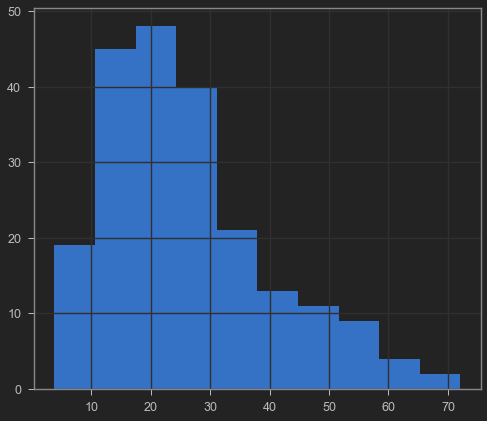

In [49]:
p_v_2018 = teste_estacionariedade(dados_medios_completados_2018)
dados_medios_completados_2018.hist()

Resultados do teste Dickey Fuller:
Teste estatístico              -7.500637e+00
p-value                         4.262830e-11
#Lags Usados                    1.000000e+00
Número de observações usadas    2.100000e+02
Valores críticos (1%)          -3.461879e+00
Valores críticos (5%)          -2.875404e+00
Valores críticos (10%)         -2.574159e+00
dtype: float64


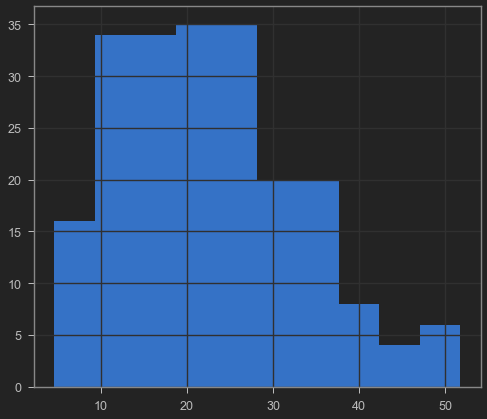

In [50]:
p_v_2019 = teste_estacionariedade(dados_medios_completados_2019)
dados_medios_completados_2019.hist()

Resultados do teste Dickey Fuller:
Teste estatístico                -5.124969
p-value                           0.000012
#Lags Usados                      2.000000
Número de observações usadas    210.000000
Valores críticos (1%)            -3.461879
Valores críticos (5%)            -2.875404
Valores críticos (10%)           -2.574159
dtype: float64


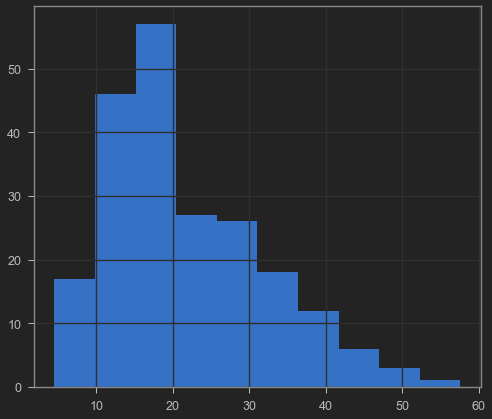

In [51]:
p_v_2020 = teste_estacionariedade(dados_medios_completados_2020)
dados_medios_completados_2020.hist()

# Etapa 5: Autocorrelação para verificar a periodicidade e sazonalidade da série

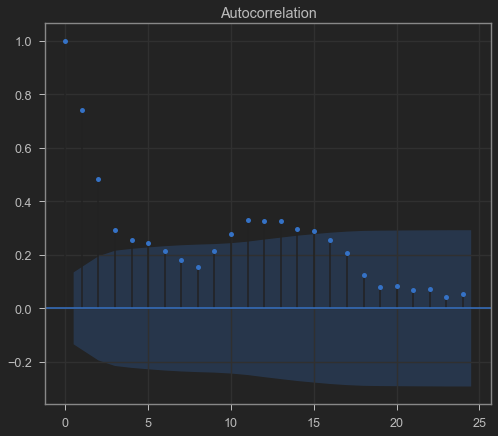

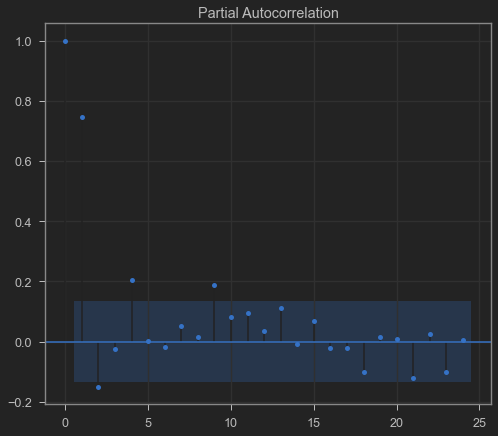

In [91]:
plot_acf(dados_medios_completados_2016);
plot_pacf(dados_medios_completados_2016);

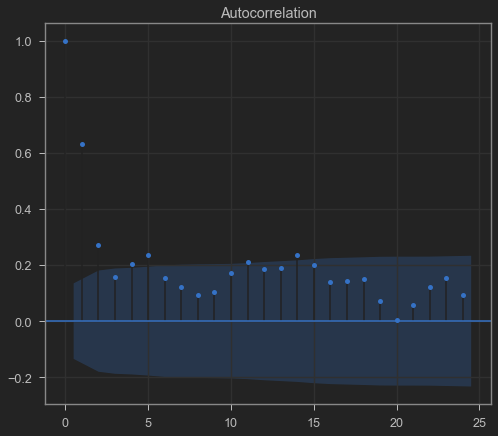

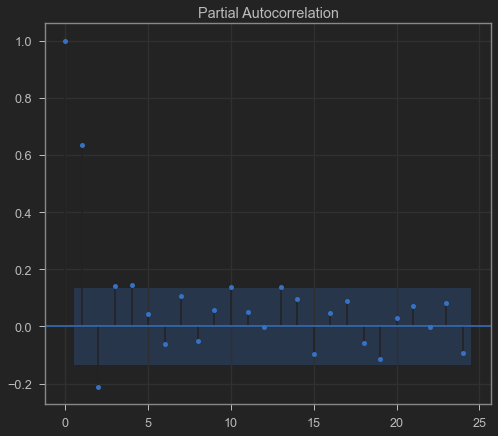

In [52]:
plot_acf(dados_medios_completados_2017);
plot_pacf(dados_medios_completados_2017);

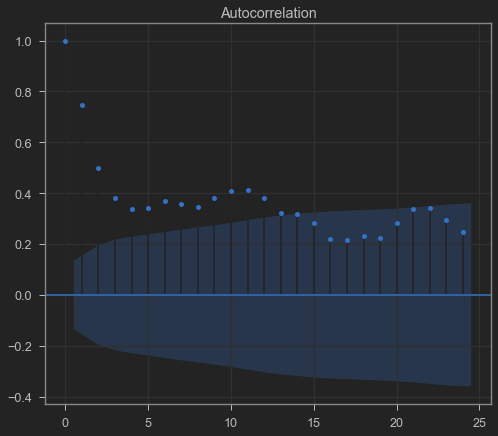

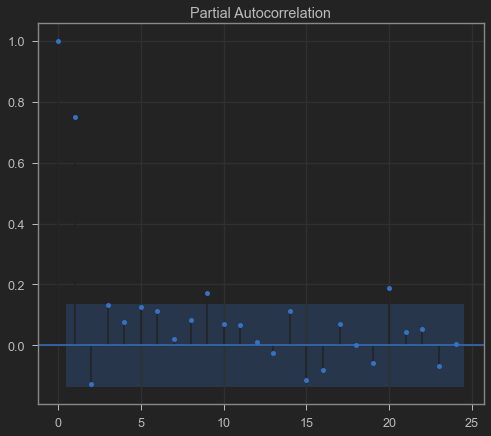

In [53]:
plot_acf(dados_medios_completados_2018);
plot_pacf(dados_medios_completados_2018);

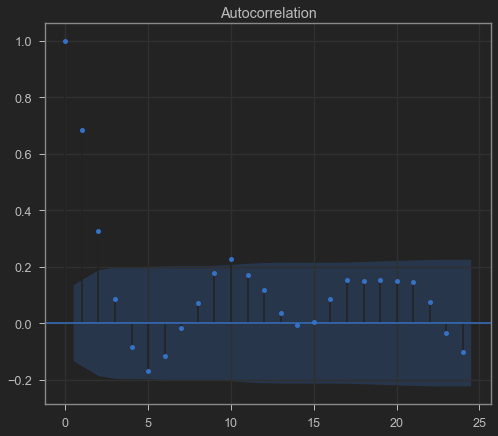

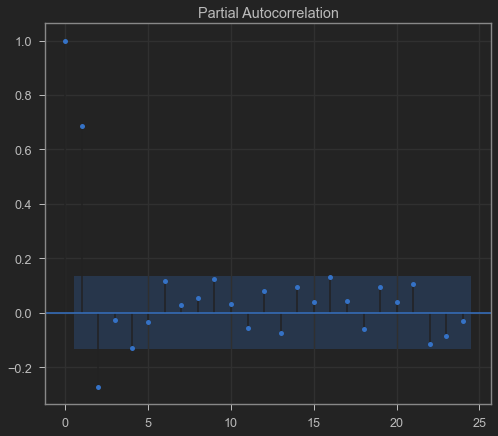

In [54]:
plot_acf(dados_medios_completados_2019);
plot_pacf(dados_medios_completados_2019);

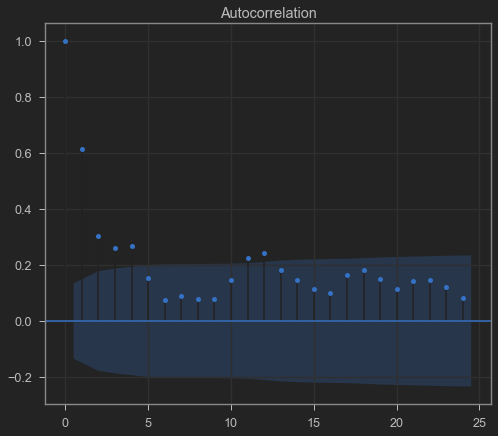

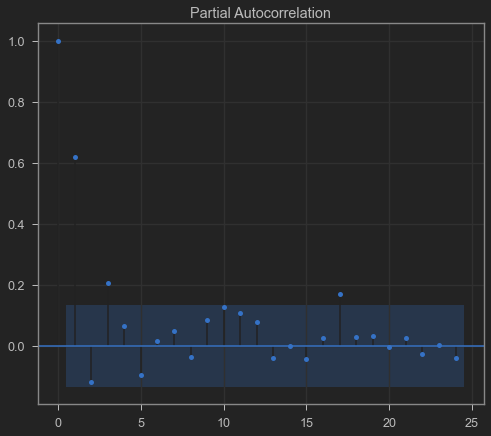

In [55]:
plot_acf(dados_medios_completados_2020);
plot_pacf(dados_medios_completados_2020);

# Etapa 6: Verificando variação nos dados - velocidade de mudança

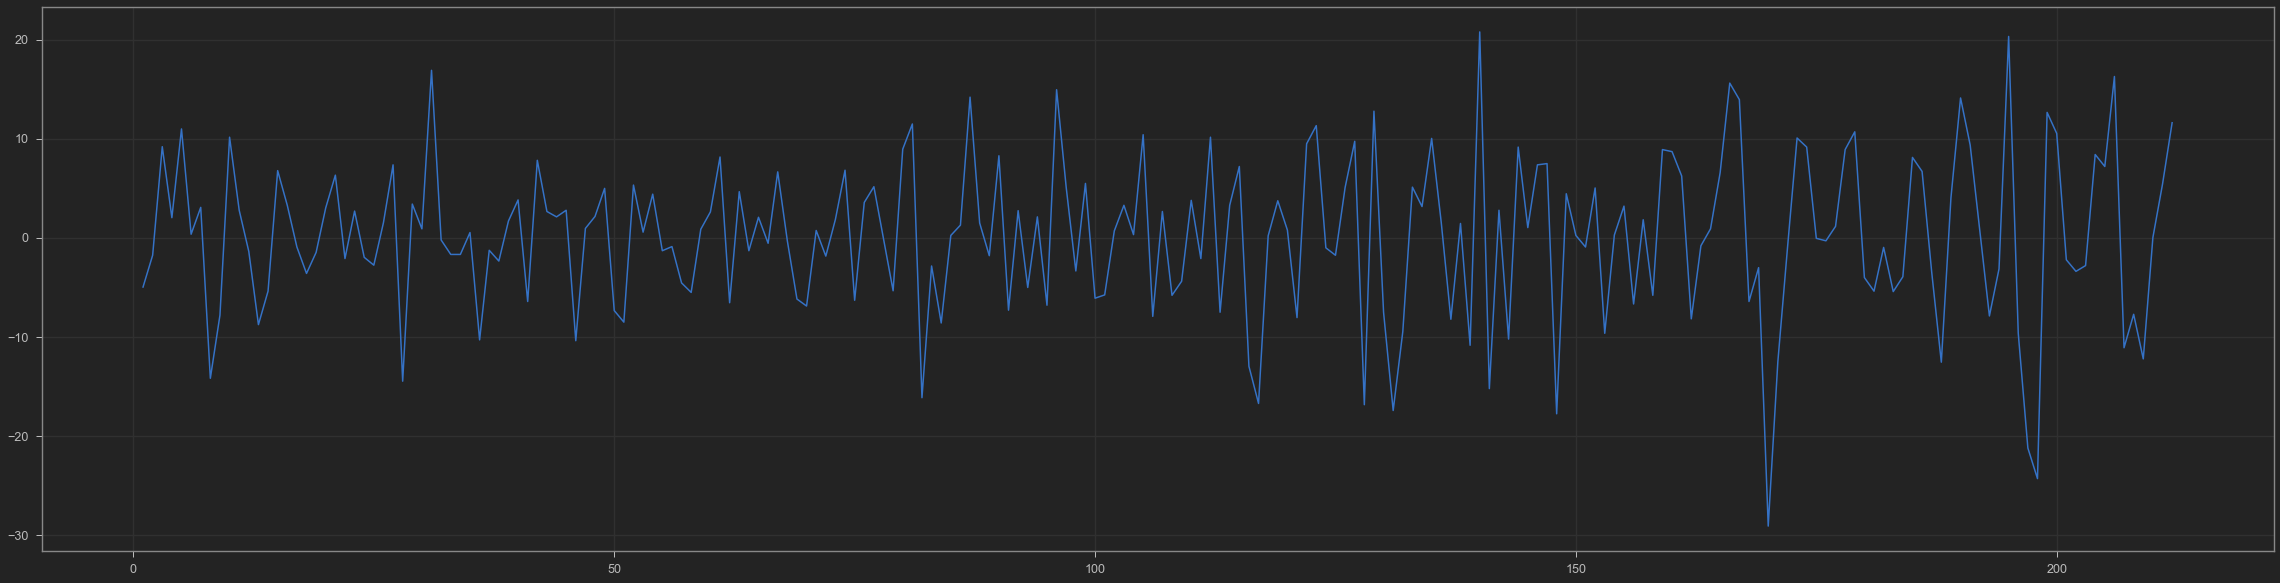

In [92]:
plt.figure(figsize=(40,10))
plt.plot(dados_medios_completados_2016.diff());

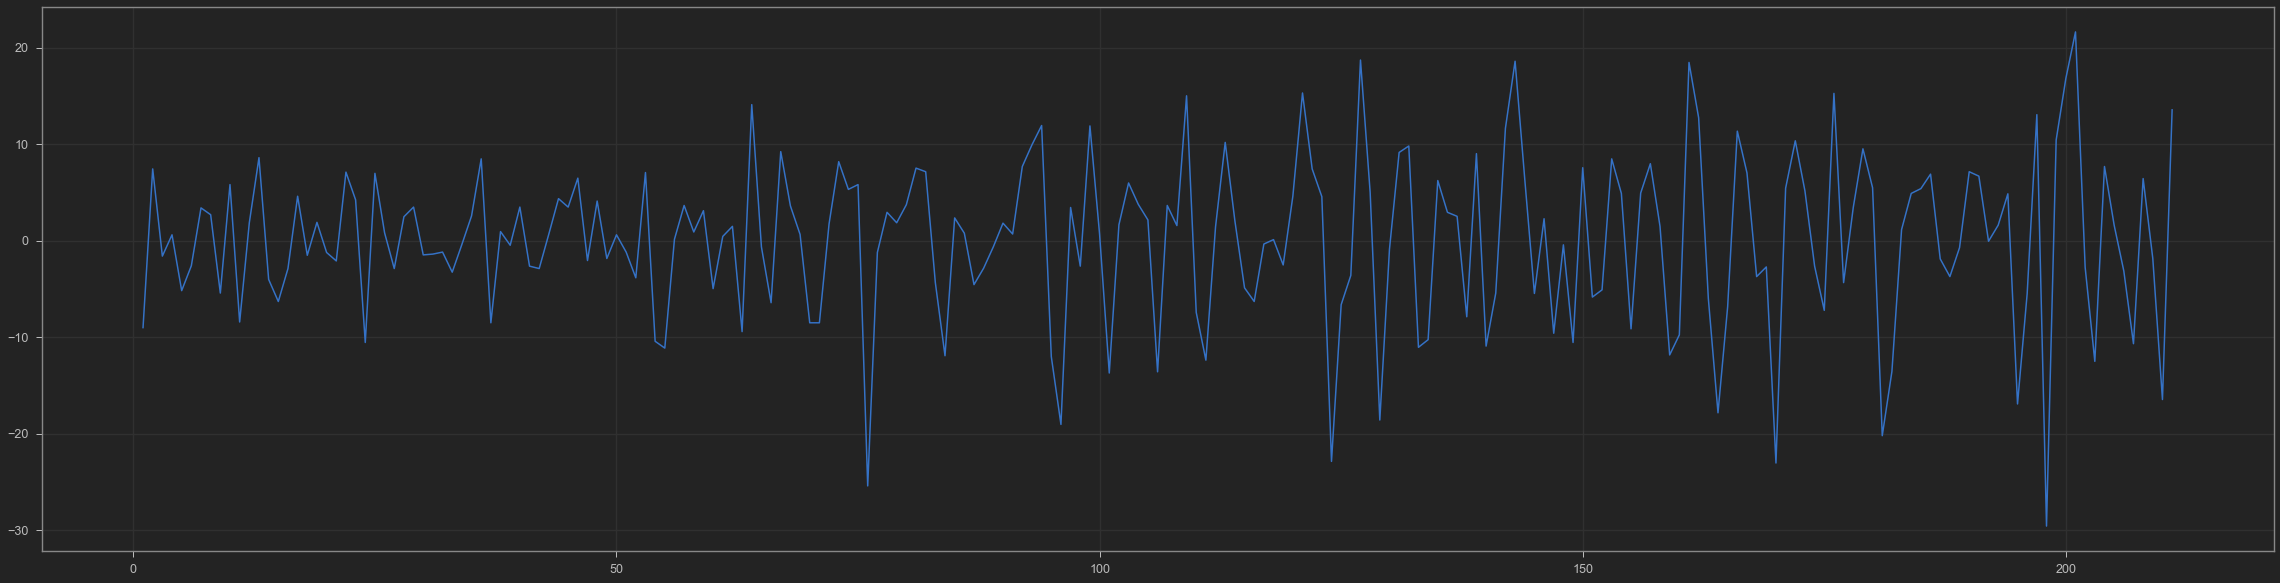

In [56]:
plt.figure(figsize=(40,10))
plt.plot(dados_medios_completados_2017.diff());

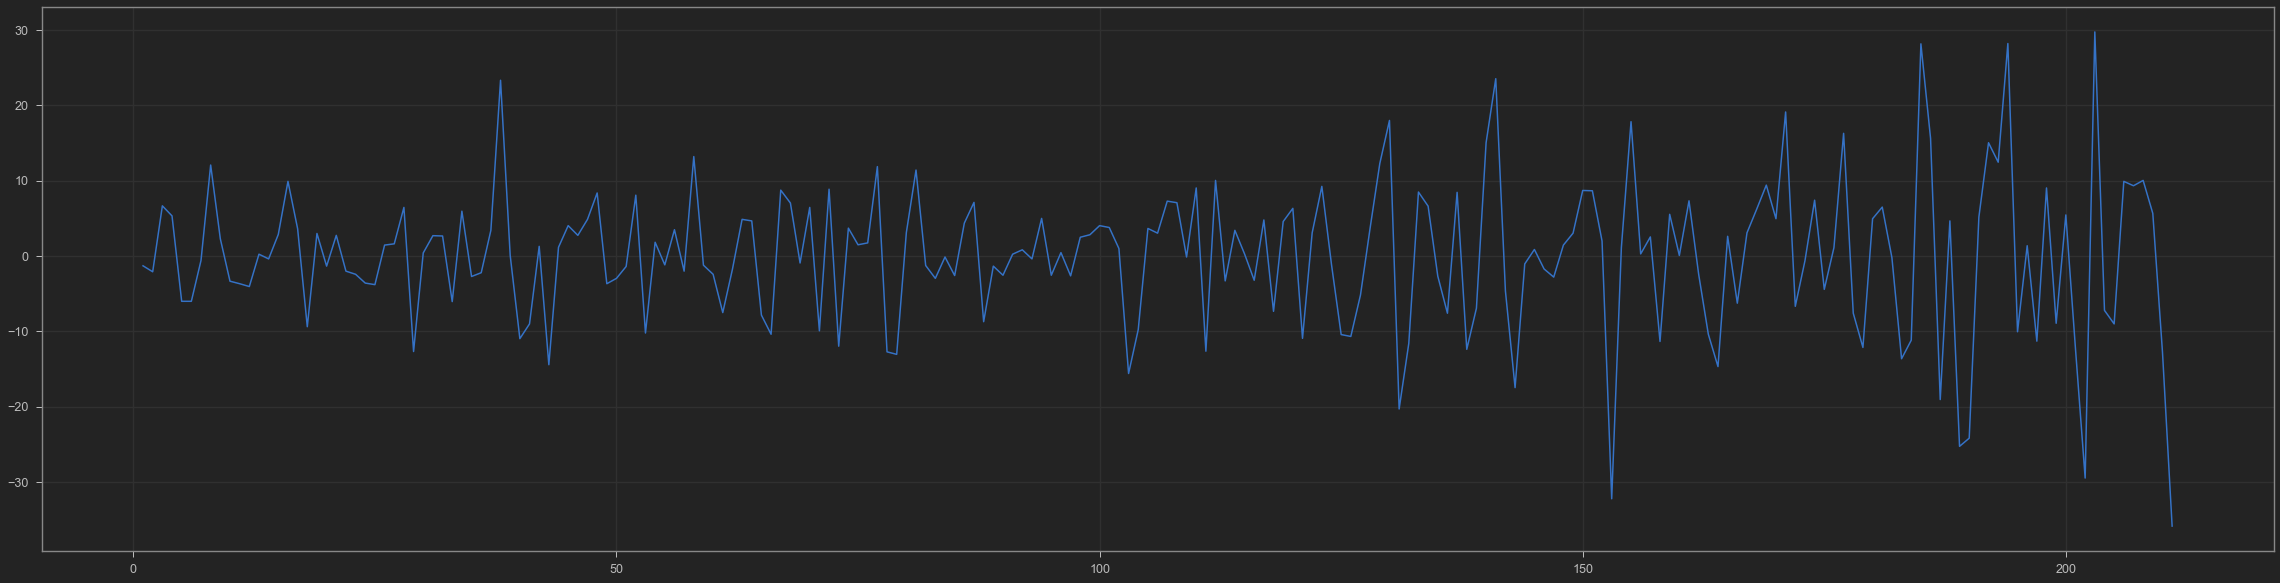

In [57]:
plt.figure(figsize=(40,10))
plt.plot(dados_medios_completados_2018.diff());

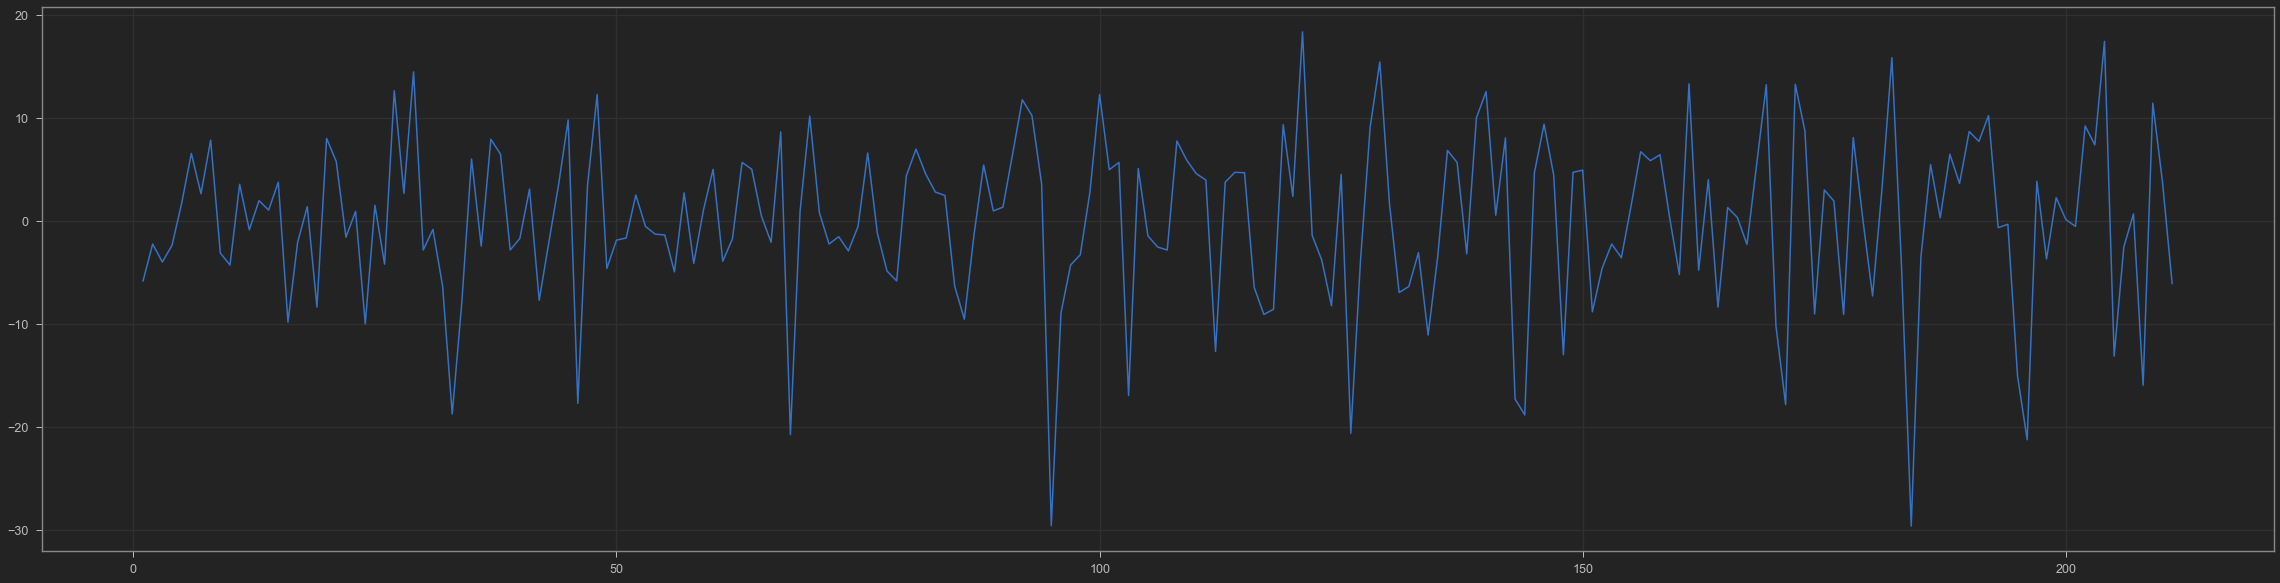

In [58]:
plt.figure(figsize=(40,10))
plt.plot(dados_medios_completados_2019.diff());

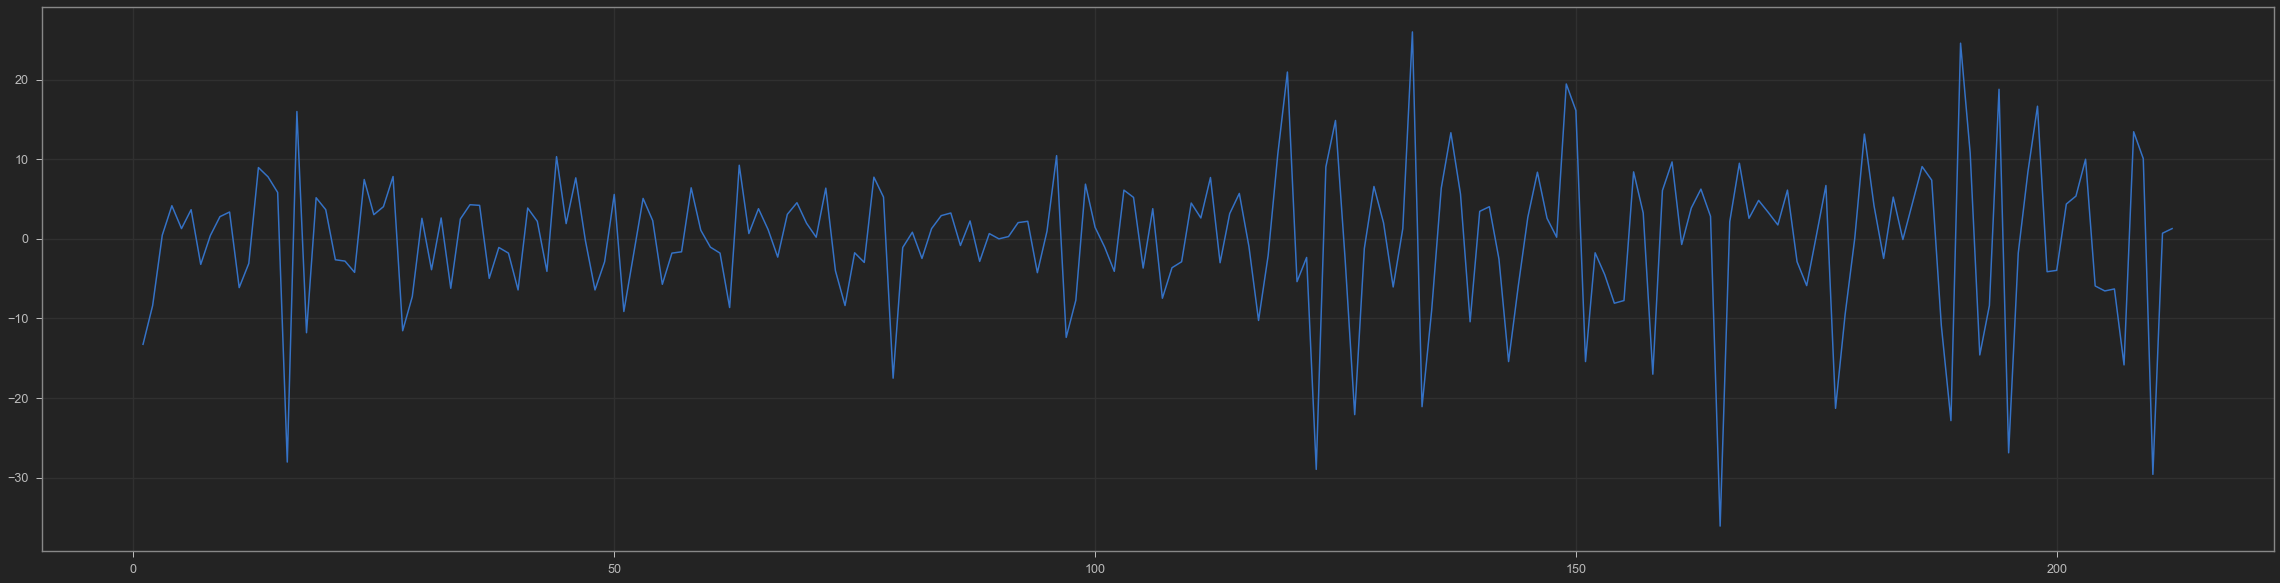

In [59]:
plt.figure(figsize=(40,10))
plt.plot(dados_medios_completados_2020.diff());

# Etapa 6: Verificando variação nos dados - aceleração de mudança

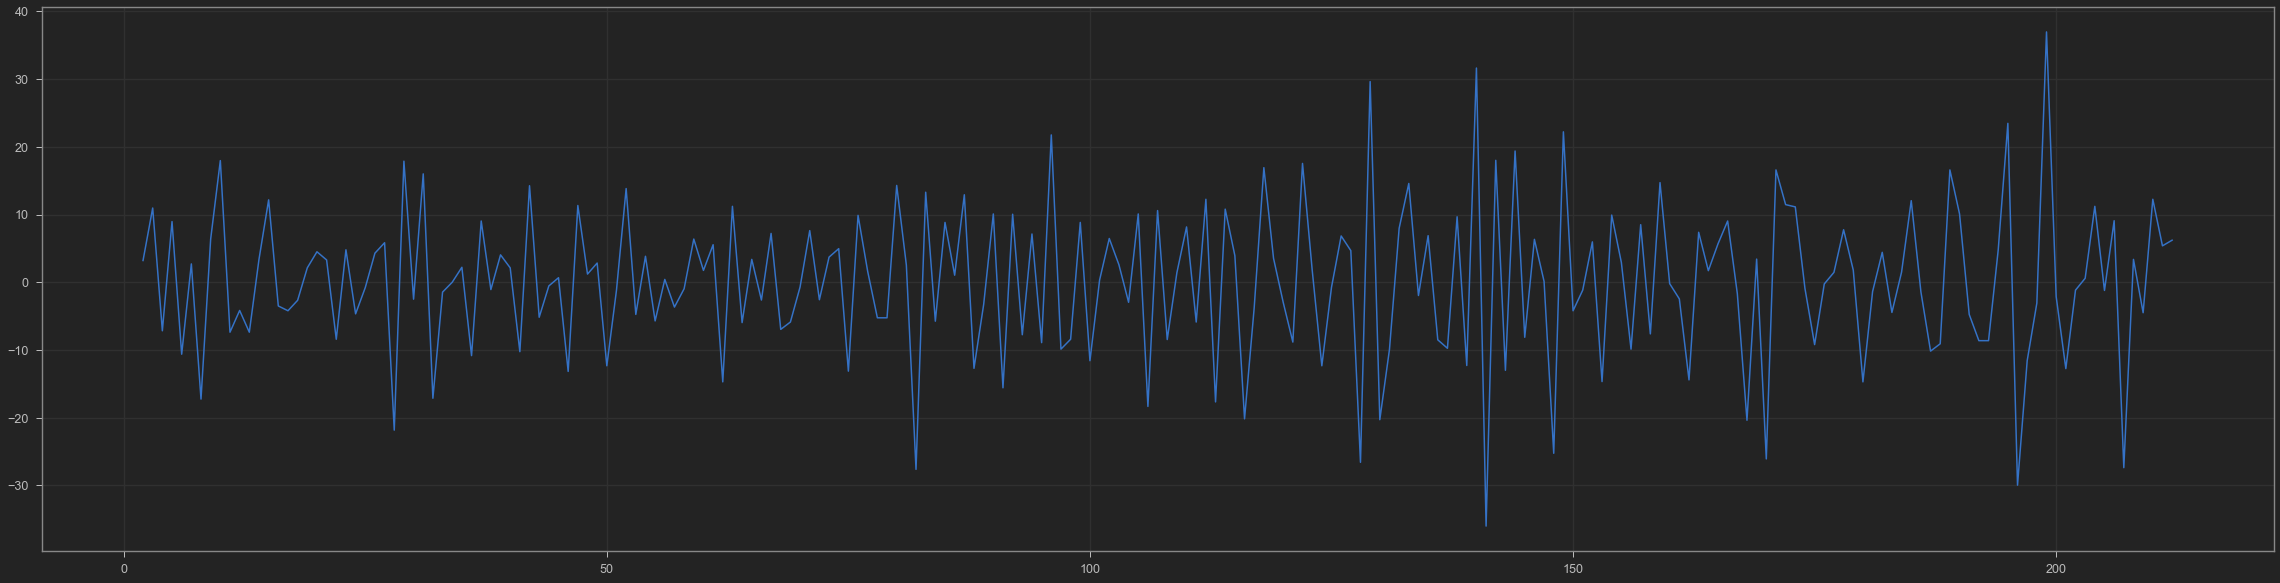

In [93]:
plt.figure(figsize=(40,10))
velocidade_2016 = dados_medios_completados_2016.diff()
plt.plot(velocidade_2016.diff());

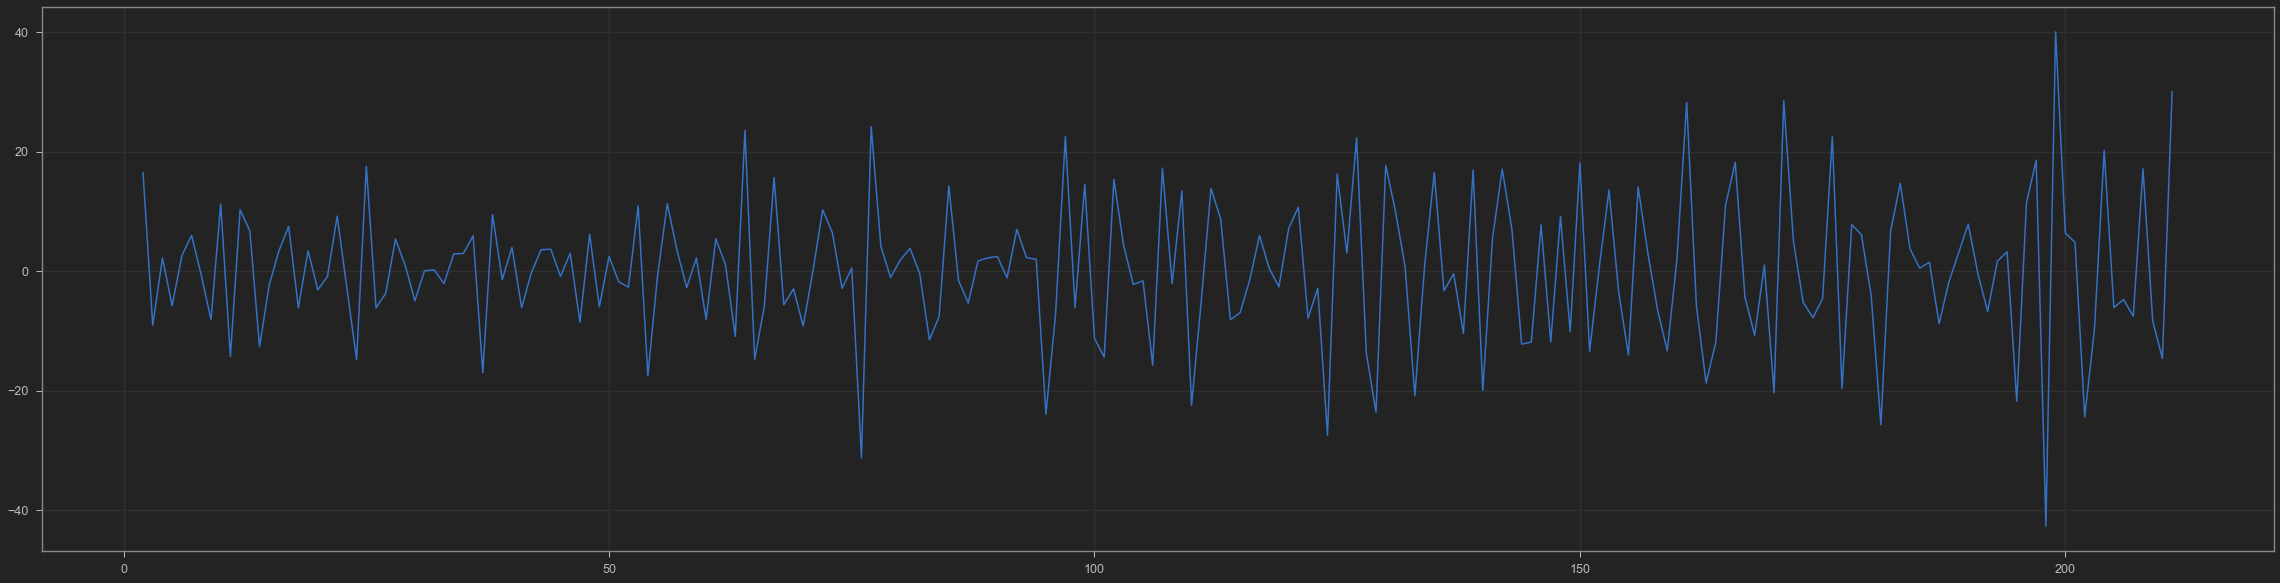

In [60]:
plt.figure(figsize=(40,10))
velocidade_2017 = dados_medios_completados_2017.diff()
plt.plot(velocidade_2017.diff());

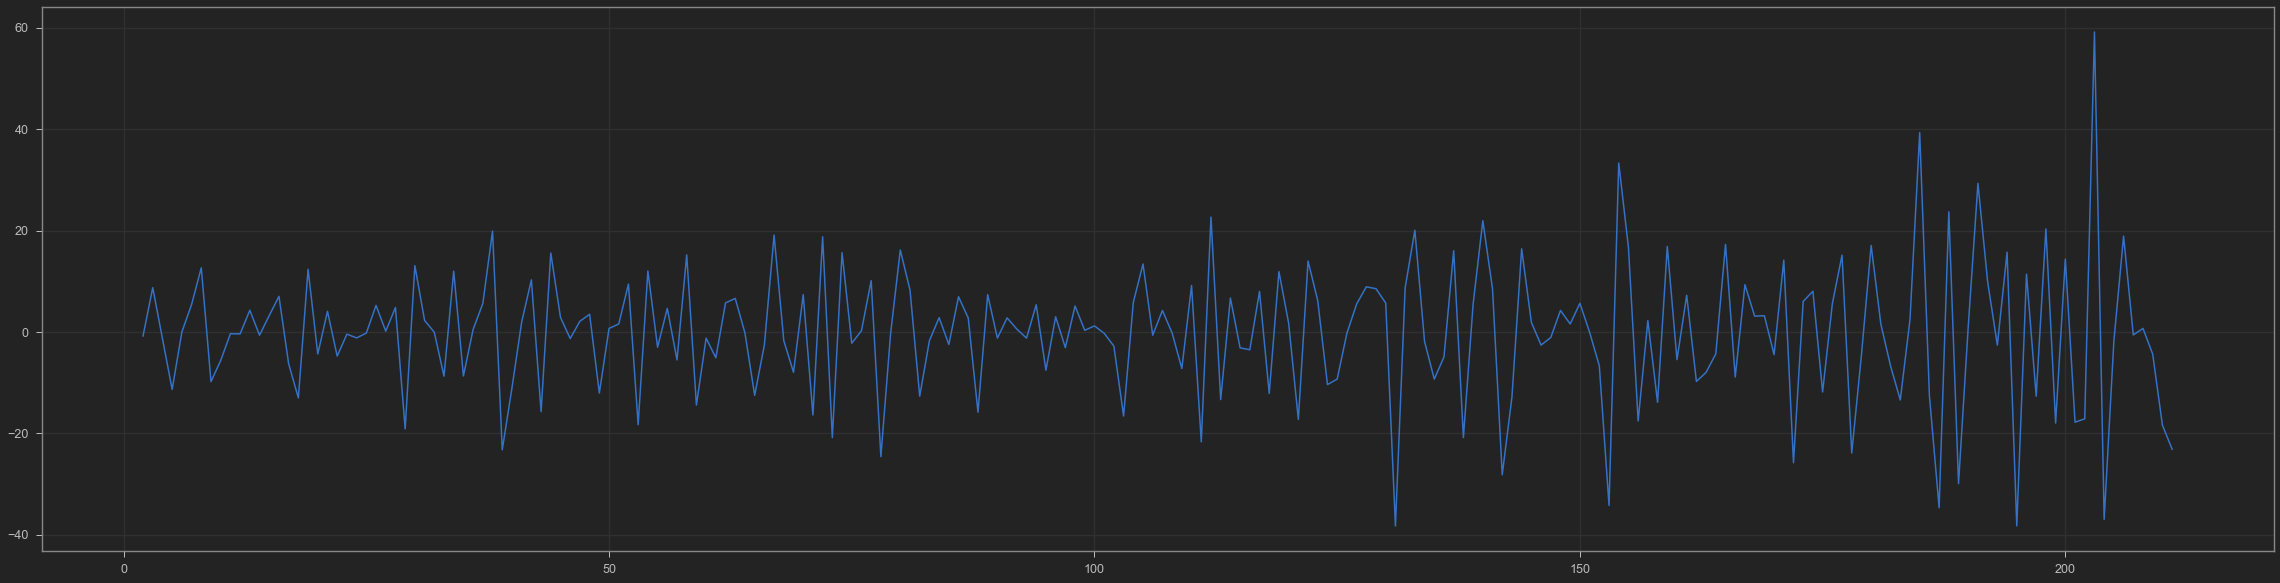

In [61]:
plt.figure(figsize=(40,10))
velocidade_2018 = dados_medios_completados_2018.diff()
plt.plot(velocidade_2018.diff());

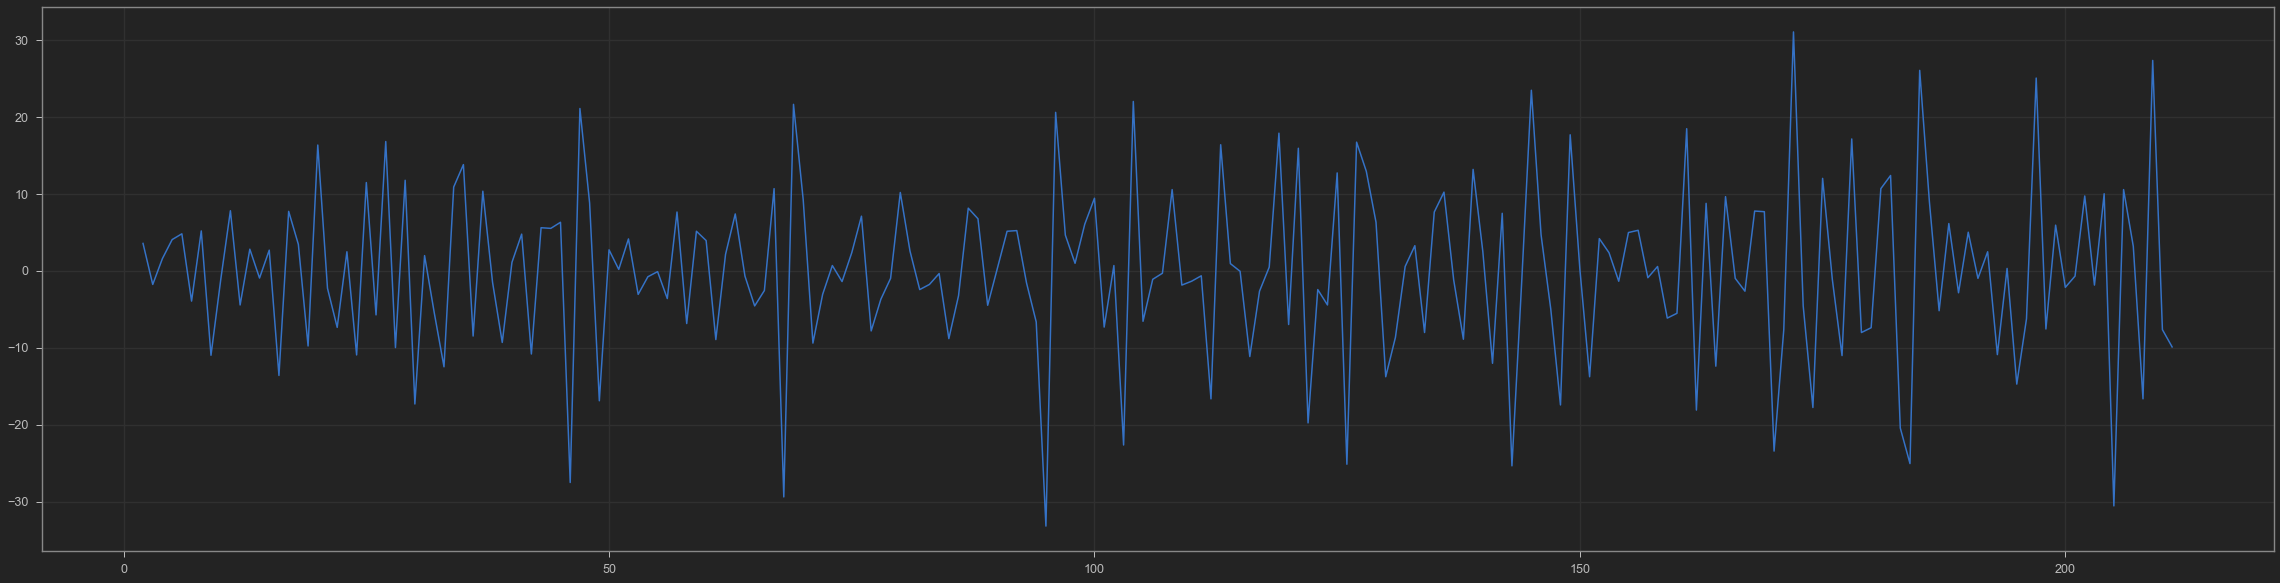

In [62]:
plt.figure(figsize=(40,10))
velocidade_2019 = dados_medios_completados_2019.diff()
plt.plot(velocidade_2019.diff());

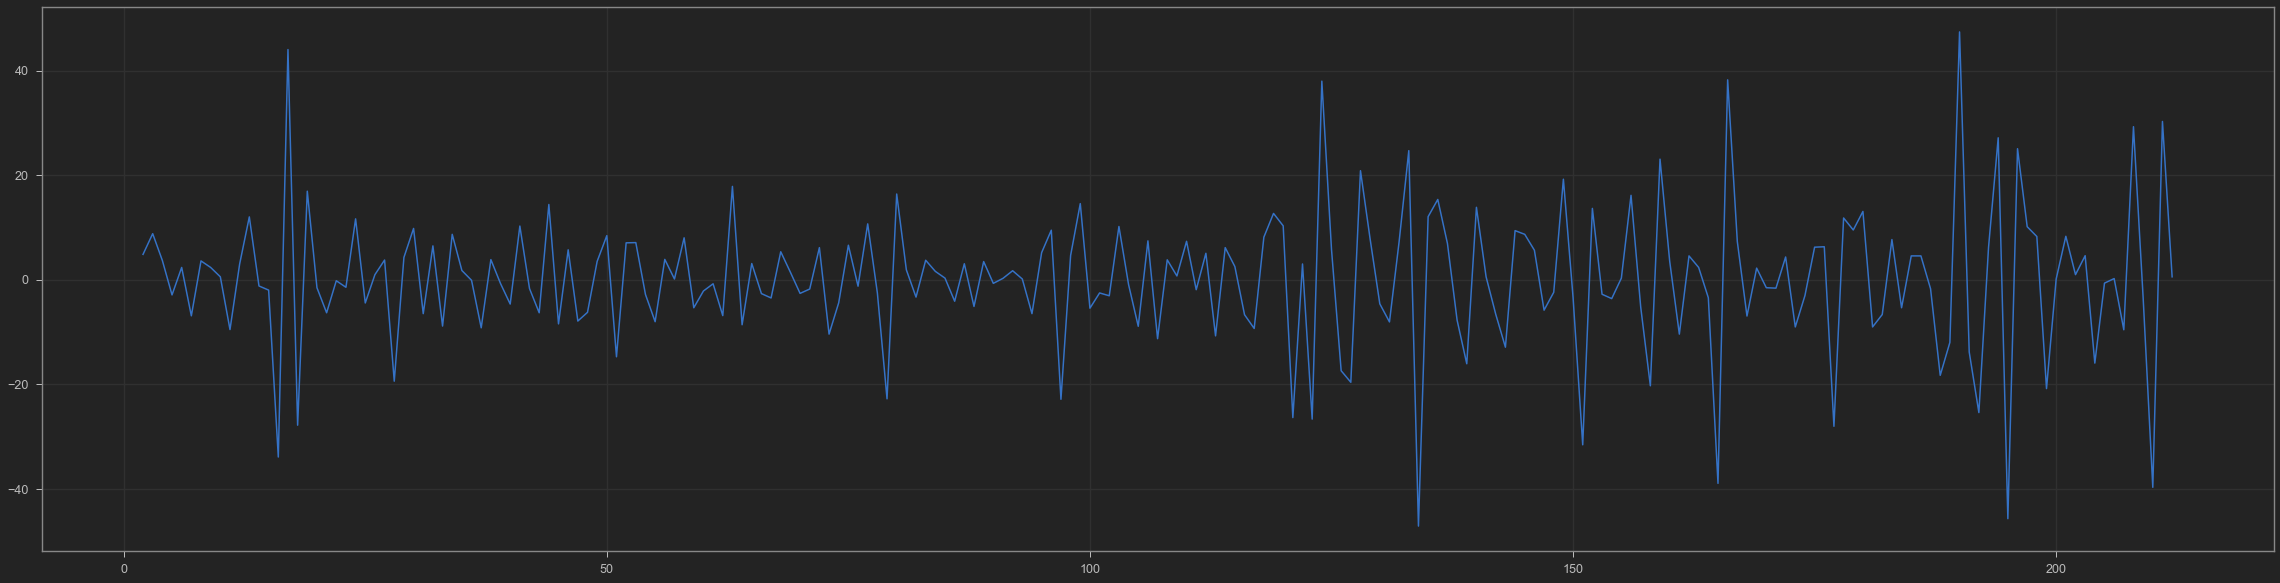

In [63]:
plt.figure(figsize=(40,10))
velocidade_2020 = dados_medios_completados_2020.diff()
plt.plot(velocidade_2020.diff());

# Etapa 7: Autocorrelação da série

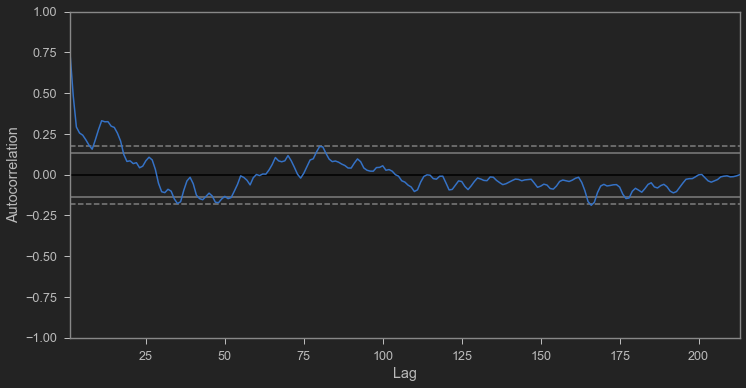

In [94]:
plt.figure(figsize=(12,6))
autocorrelation_plot(dados_medios_completados_2016)

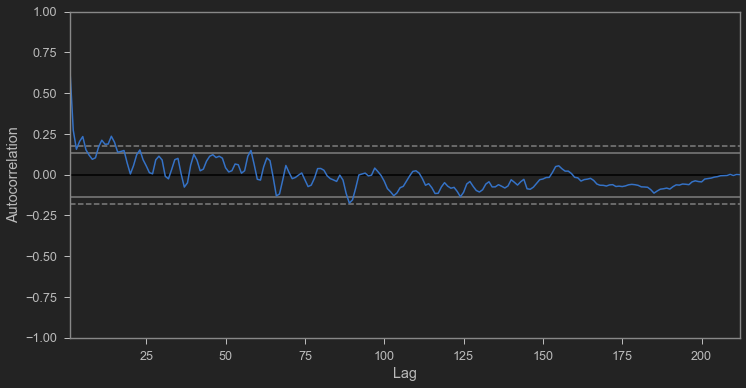

In [64]:
plt.figure(figsize=(12,6))
autocorrelation_plot(dados_medios_completados_2017)

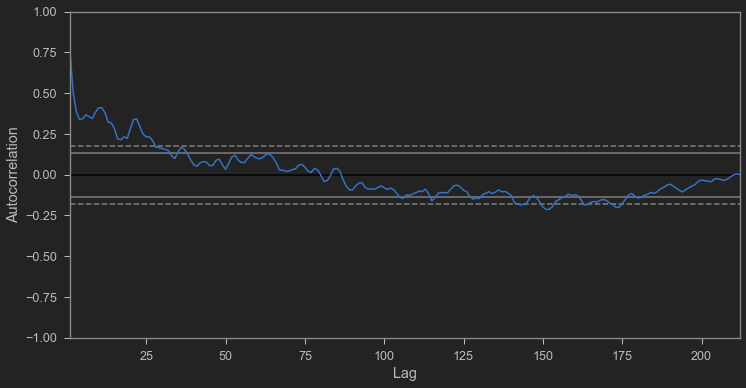

In [65]:
plt.figure(figsize=(12,6))
autocorrelation_plot(dados_medios_completados_2018)

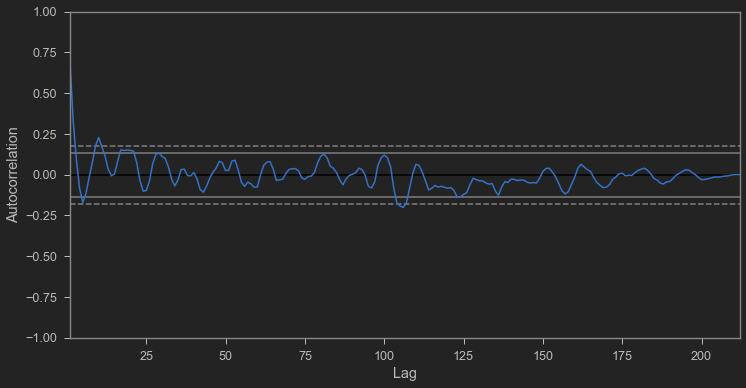

In [66]:
plt.figure(figsize=(12,6))
autocorrelation_plot(dados_medios_completados_2019)

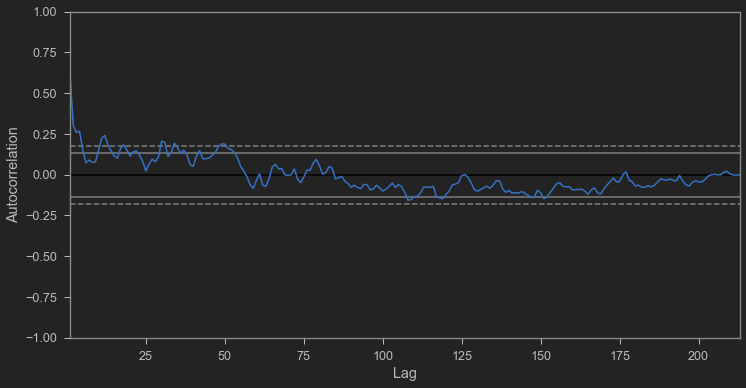

In [67]:
plt.figure(figsize=(12,6))
autocorrelation_plot(dados_medios_completados_2020)

# Parte 2: Juntando os dados

In [95]:
serie_completa = dados_medios_completados_2017
serie_completa = serie_completa.append(dados_medios_completados_2018)
serie_completa = serie_completa.append(dados_medios_completados_2019)
serie_completa = serie_completa.append(dados_medios_completados_2020)
serie_completa.reset_index(drop=True,inplace=True)
serie_completa

0      25.500000
1      16.500000
2      23.958333
3      22.375000
4      23.000000
         ...    
844    30.041667
845    40.125000
846    10.541667
847    10.541667
848    12.541667
Length: 849, dtype: float64

# Etapa 3: Decompondo a série

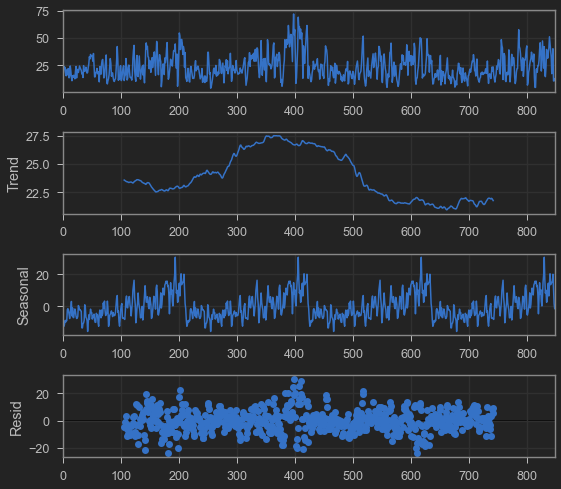

In [96]:
resultado = seasonal_decompose(serie_completa,period=212)
resultado.plot();

# Etapa 4: Teste de estacionariedade

Resultados do teste Dickey Fuller:
Teste estatístico                -3.986118
p-value                           0.001485
#Lags Usados                     16.000000
Número de observações usadas    832.000000
Valores críticos (1%)            -3.438234
Valores críticos (5%)            -2.865020
Valores críticos (10%)           -2.568623
dtype: float64


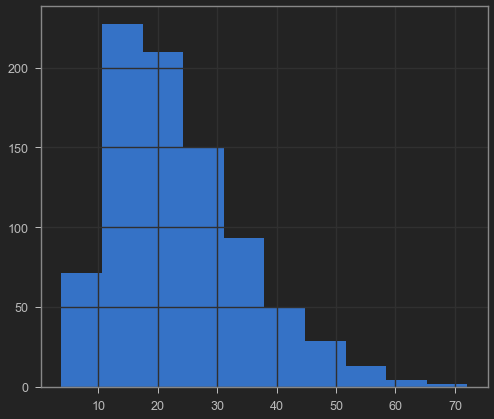

In [70]:
p_value = teste_estacionariedade(serie_completa)
serie_completa.hist()

# Etapa 5: Autocorrelação para verificar a periodicidade e sazonalidade da série

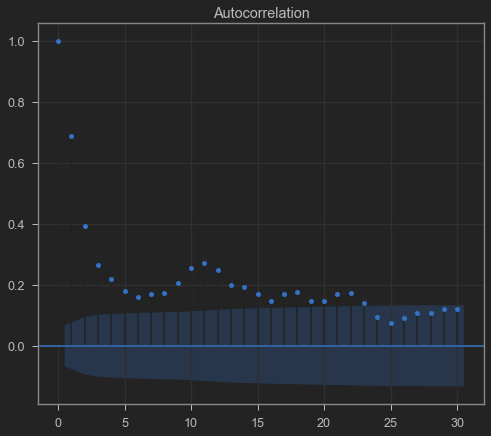

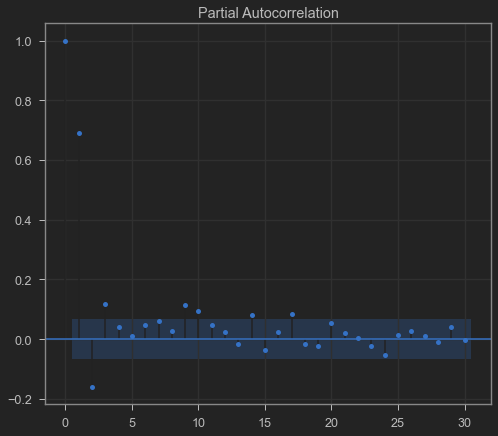

In [71]:
plot_acf(serie_completa);
plot_pacf(serie_completa);

# Etapa 6: Verificando variação nos dados - velocidade de mudança

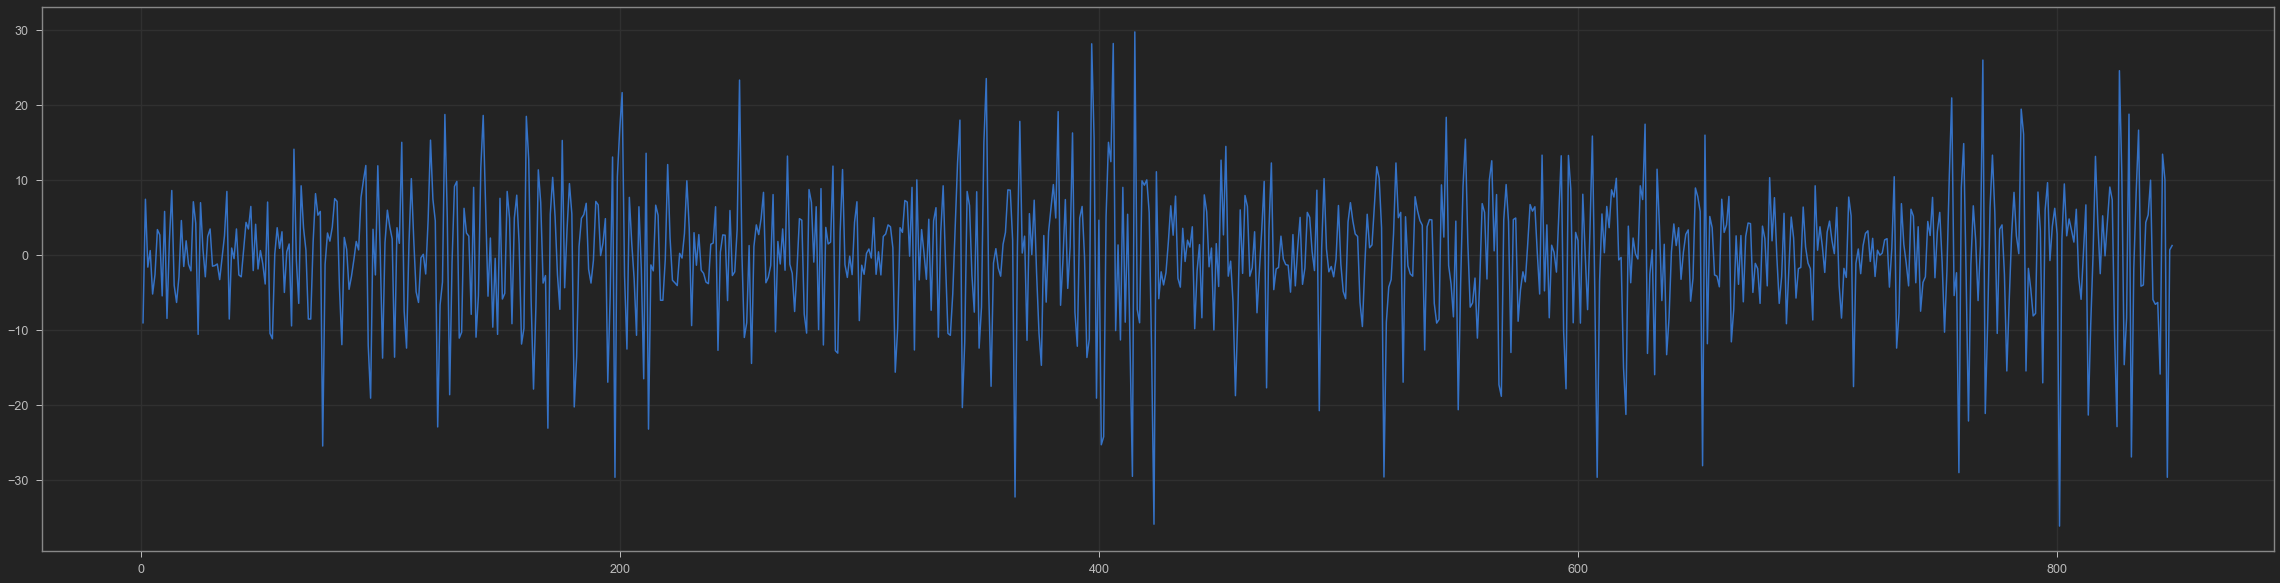

In [72]:
plt.figure(figsize=(40,10))
plt.plot(serie_completa.diff())

# Etapa 7: Verificando variação nos dados - aceleração de mudança

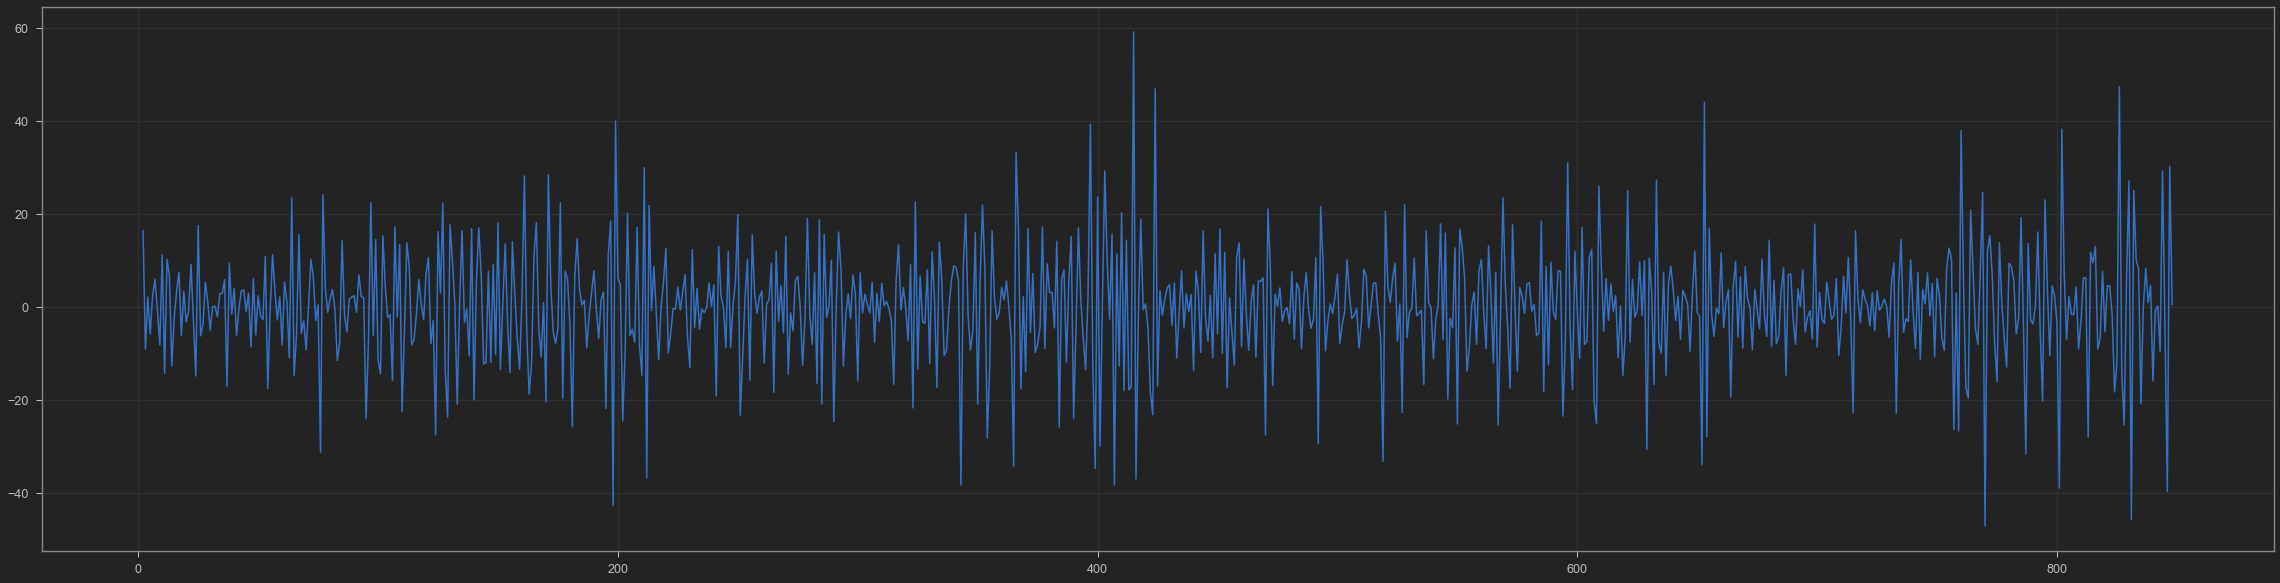

In [73]:
plt.figure(figsize=(40,10))
plt.plot(serie_completa.diff().diff())

# Etapa 7: Autocorrelação da série

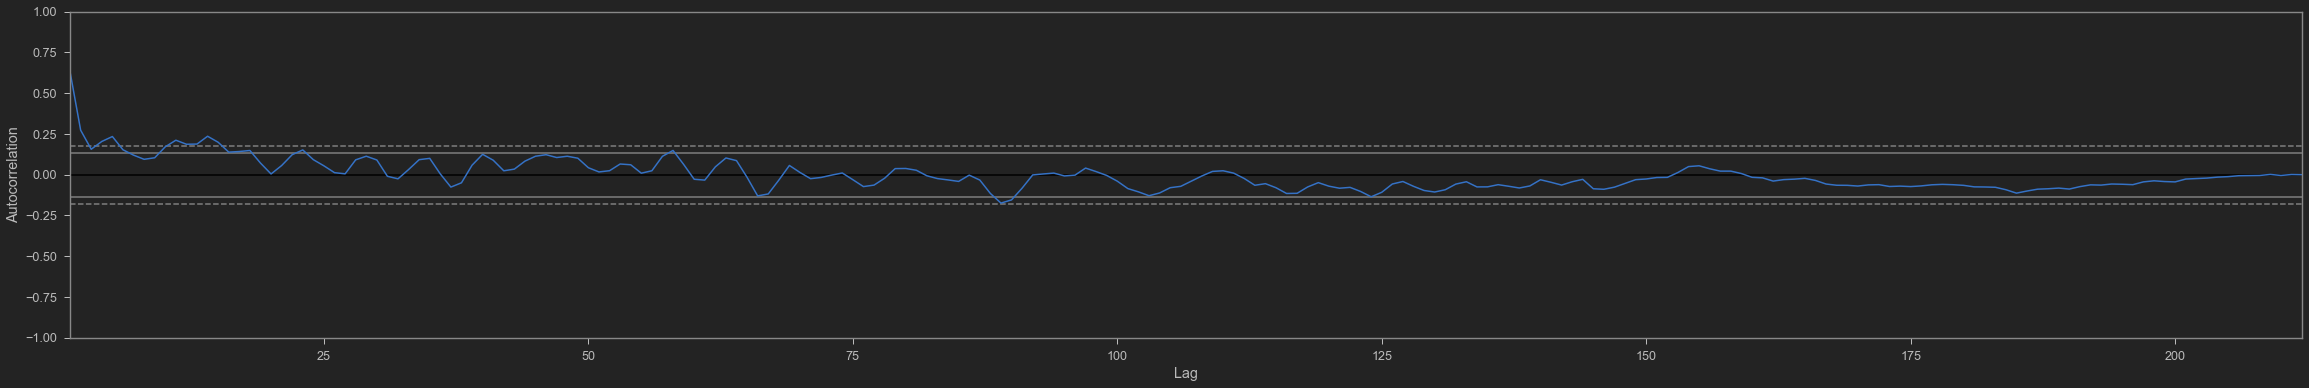

In [74]:
plt.figure(figsize=(40,6))
autocorrelation_plot(dados_medios_completados_2017)

# Comparação com os dados de 2016

In [77]:
serie_completa_com_2016 = dados_medios_completados_2016
serie_completa_com_2016 = serie_completa_com_2016.append(dados_medios_completados_2018)
serie_completa_com_2016 = serie_completa_com_2016.append(dados_medios_completados_2019)
serie_completa_com_2016 = serie_completa_com_2016.append(dados_medios_completados_2020)
serie_completa_com_2016.reset_index(drop=True,inplace=True)
serie_completa_com_2016

--------------------------------------------------
------------------------ 2016 --------------------
--------------------------------------------------
3.27% dos dados da bases são faltantes
****************************************   Base de dados completada   ****************************************


1     2     3     4     5     6     7     8     9    10  ...    15  \
0  28.0  31.0  28.0  21.0  17.0   9.0  10.0   7.0  15.0   8.0  ...  12.0   
1  12.0  23.0  25.0   8.0   5.0   3.0   5.0  14.0  16.0  10.0  ...   6.0   
2   2.0   9.0   7.0   7.0   6.0   6.0   4.0   8.0   4.0  11.0  ...  13.0   
3   4.0   6.0  14.0   6.0  10.0  12.0  20.0  18.0  18.0  19.0  ...  13.0   
4  12.0  16.0  21.0  13.0  15.0  13.0  15.0  21.0  20.0  41.0  ...  27.0   

     16    17    18    19    20    21    22    23    24  
0  14.0  16.0  21.0   9.0  11.0  15.0   5.0   9.0  11.0  
1  14.0   8.0   1.0   3.0   2.0   1.0   9.0   7.0   5.0  
2   9.0  11.0   9.0  16.0   6.0   4.0   2.0   6.0   6.0  
3  28.0  25.0  20.0  27.0  11.0  17.0  22.0  14.0  15.0  
4   5.0  27.0  31.0  21.0  14.0   2.0 -14.0  23.0   6.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(213, 24)

**************************************** Média diária dos dados ****************************************


0      14.250000
1       9.291667
2       7.541667
3      16.750000
4      18.416667
         ...    
208    37.375000
209    25.166667
210    25.208333
211    30.625000
212    42.250000
Length: 213, dtype: float64

0      14.250000
1       9.291667
2       7.541667
3      16.750000
4      18.416667
         ...    
845    30.041667
846    40.125000
847    10.541667
848    11.250000
849    12.541667
Length: 850, dtype: float64

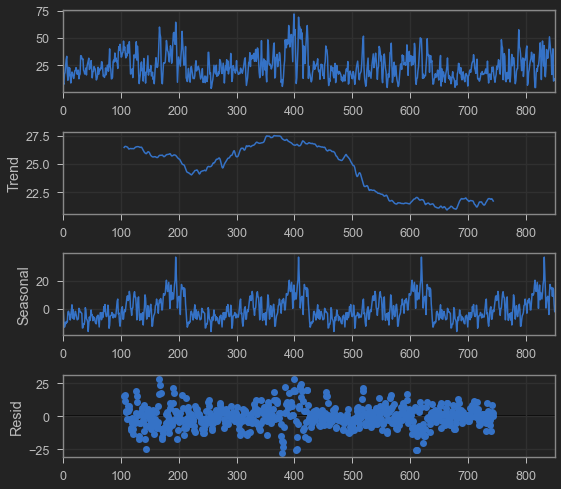

In [78]:
resultado = seasonal_decompose(serie_completa_com_2016,period=212)
resultado.plot();

Resultados do teste Dickey Fuller:
Teste estatístico                -4.758718
p-value                           0.000065
#Lags Usados                     10.000000
Número de observações usadas    839.000000
Valores críticos (1%)            -3.438168
Valores críticos (5%)            -2.864991
Valores críticos (10%)           -2.568608
dtype: float64


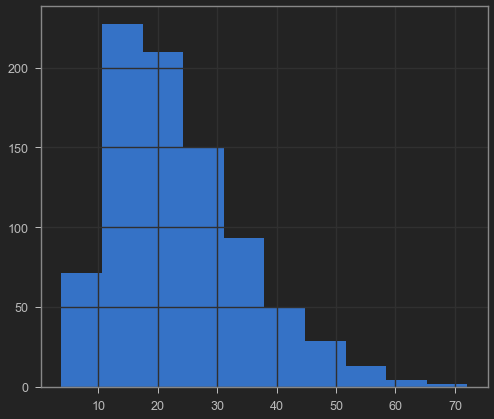

In [79]:
p_value = teste_estacionariedade(serie_completa_com_2016)
serie_completa.hist()

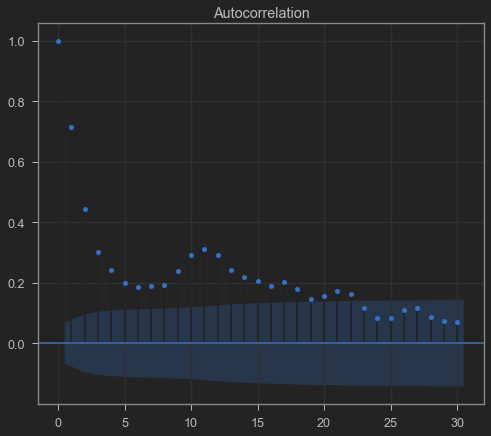

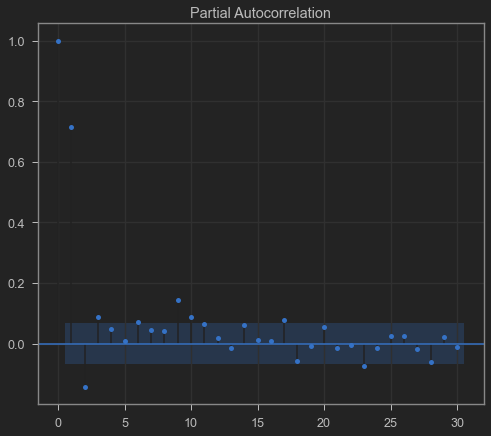

In [80]:
plot_acf(serie_completa_com_2016);
plot_pacf(serie_completa_com_2016);

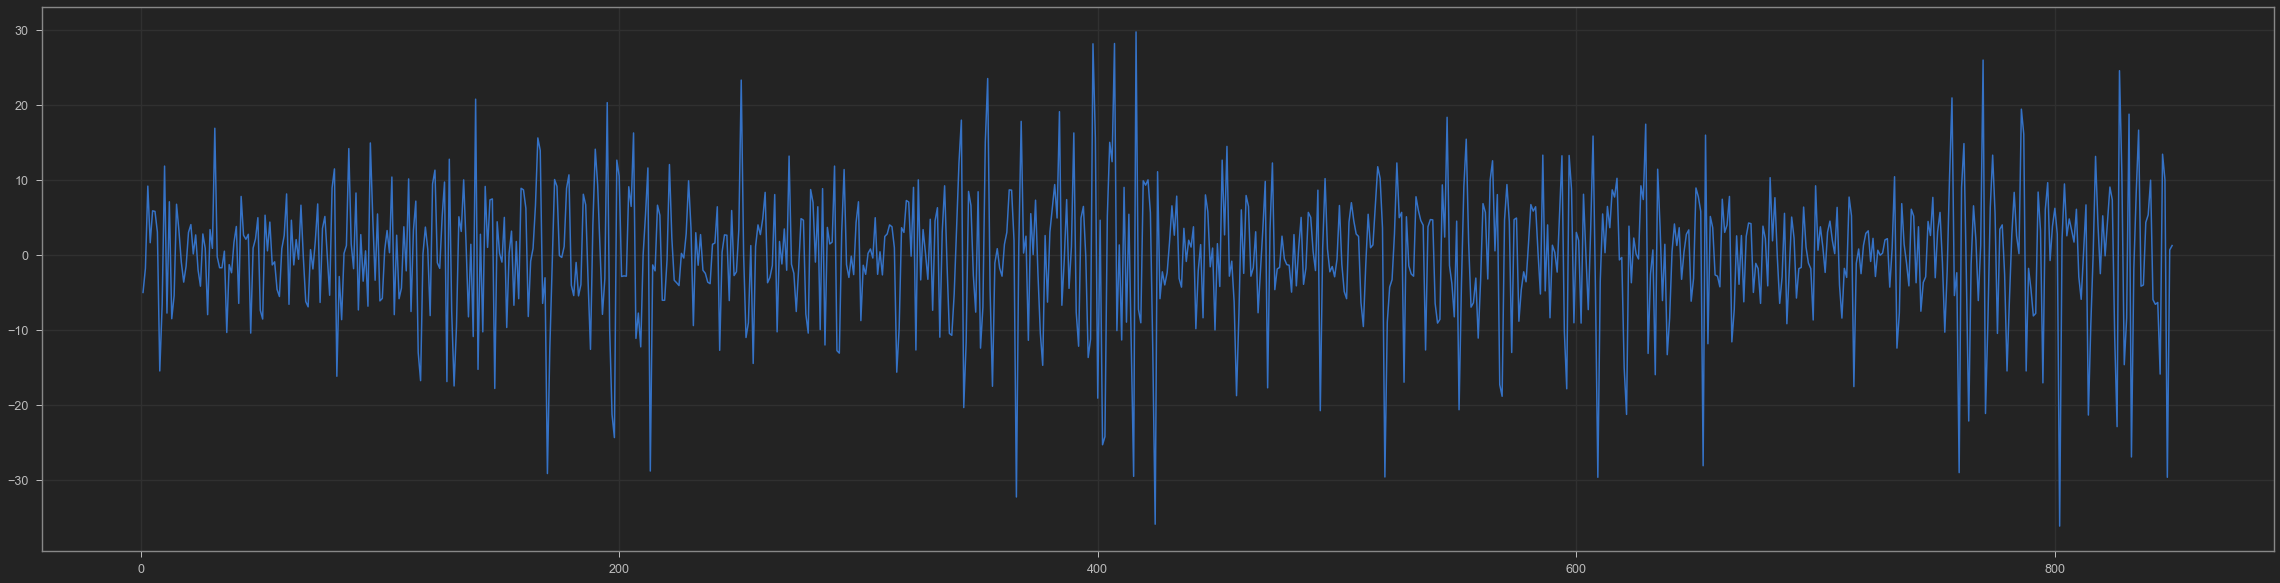

In [84]:
plt.figure(figsize=(40,10))
plt.plot(serie_completa_com_2016.diff()) 

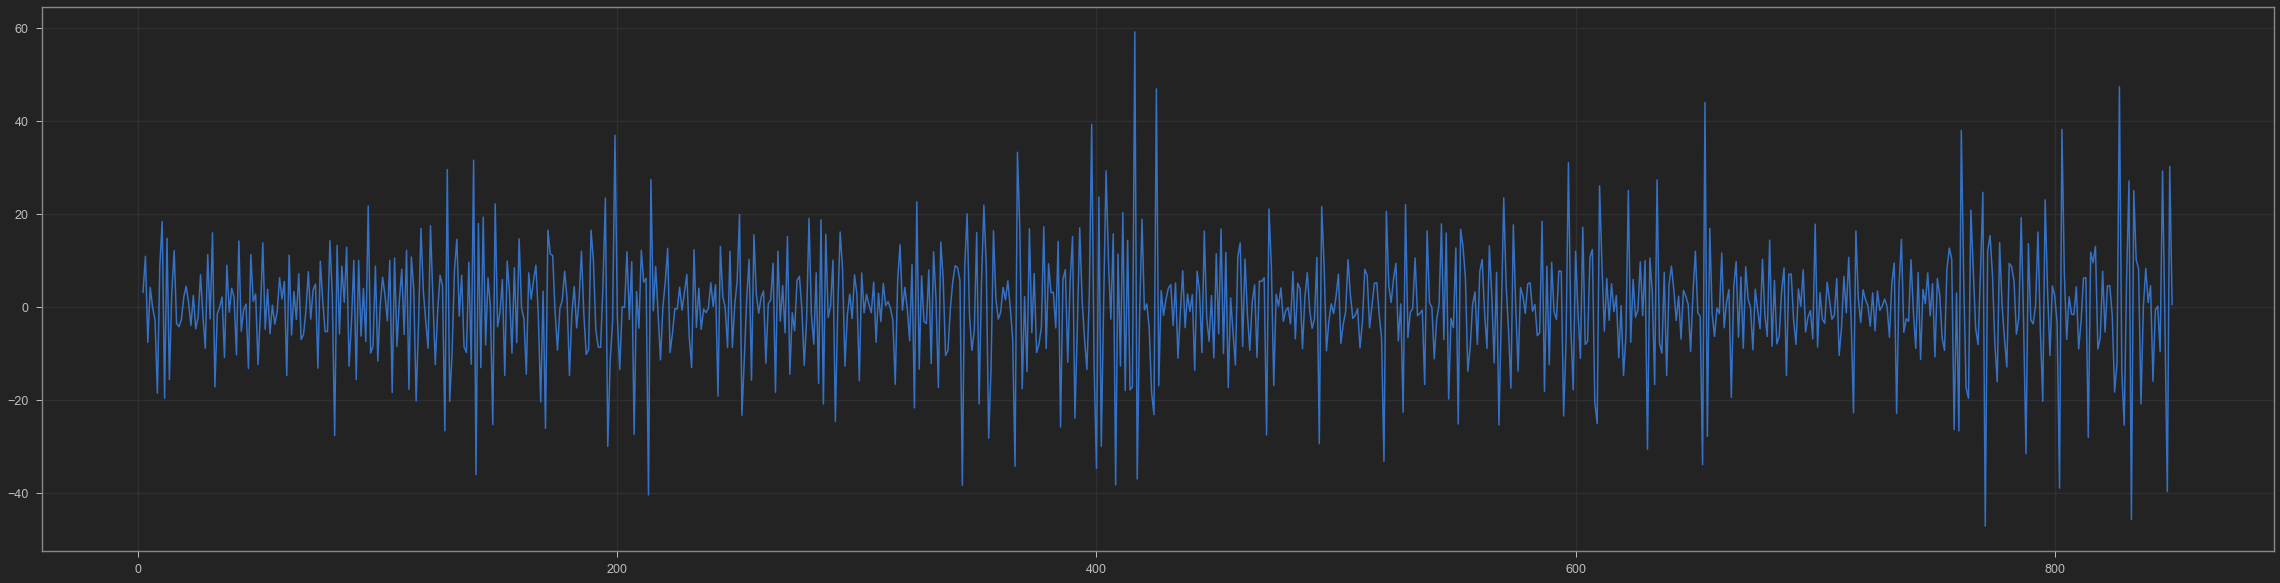

In [86]:
plt.figure(figsize=(40,10))
plt.plot(serie_completa_com_2016.diff().diff())

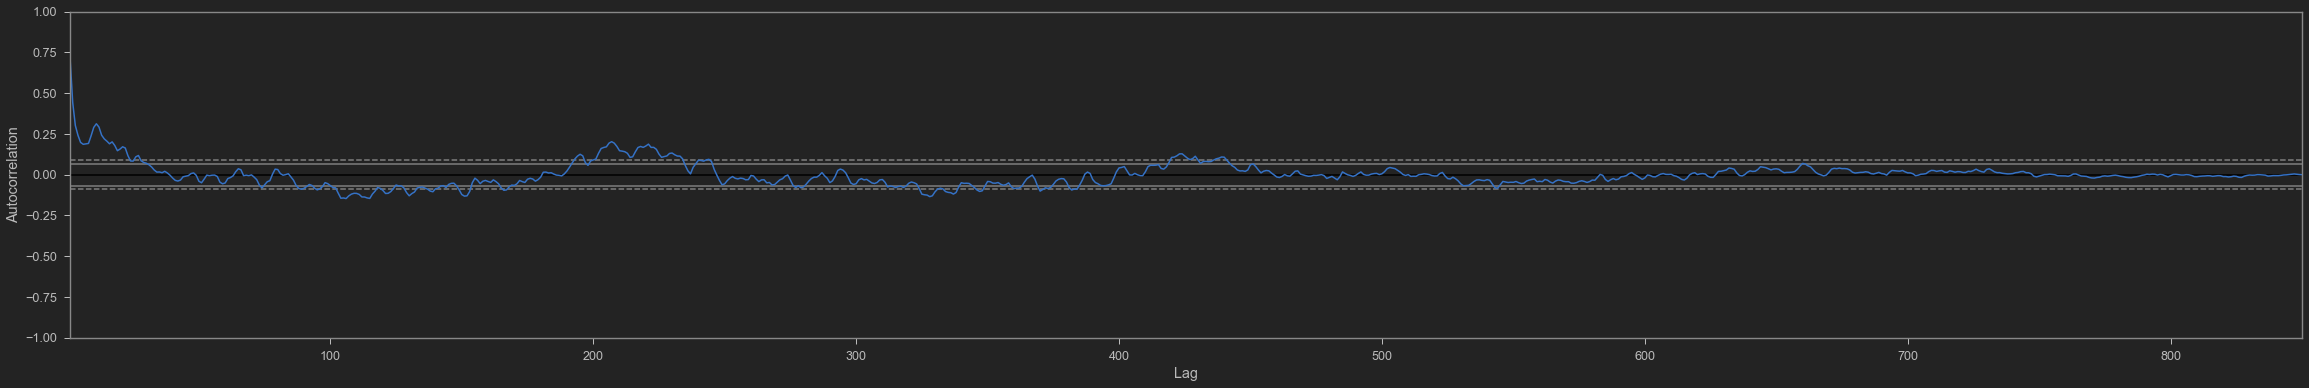

In [85]:
plt.figure(figsize=(40,6))
autocorrelation_plot(serie_completa_com_2016)